# Load dataframe

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataframe
df = pd.read_csv("path_to_4_stages_df.csv")


# Correlation analysis

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

features = df.drop(columns=['4_stages'])  # Extract features excluding the label column

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
features_imputed = pd.DataFrame(features_imputed, columns=features.columns)

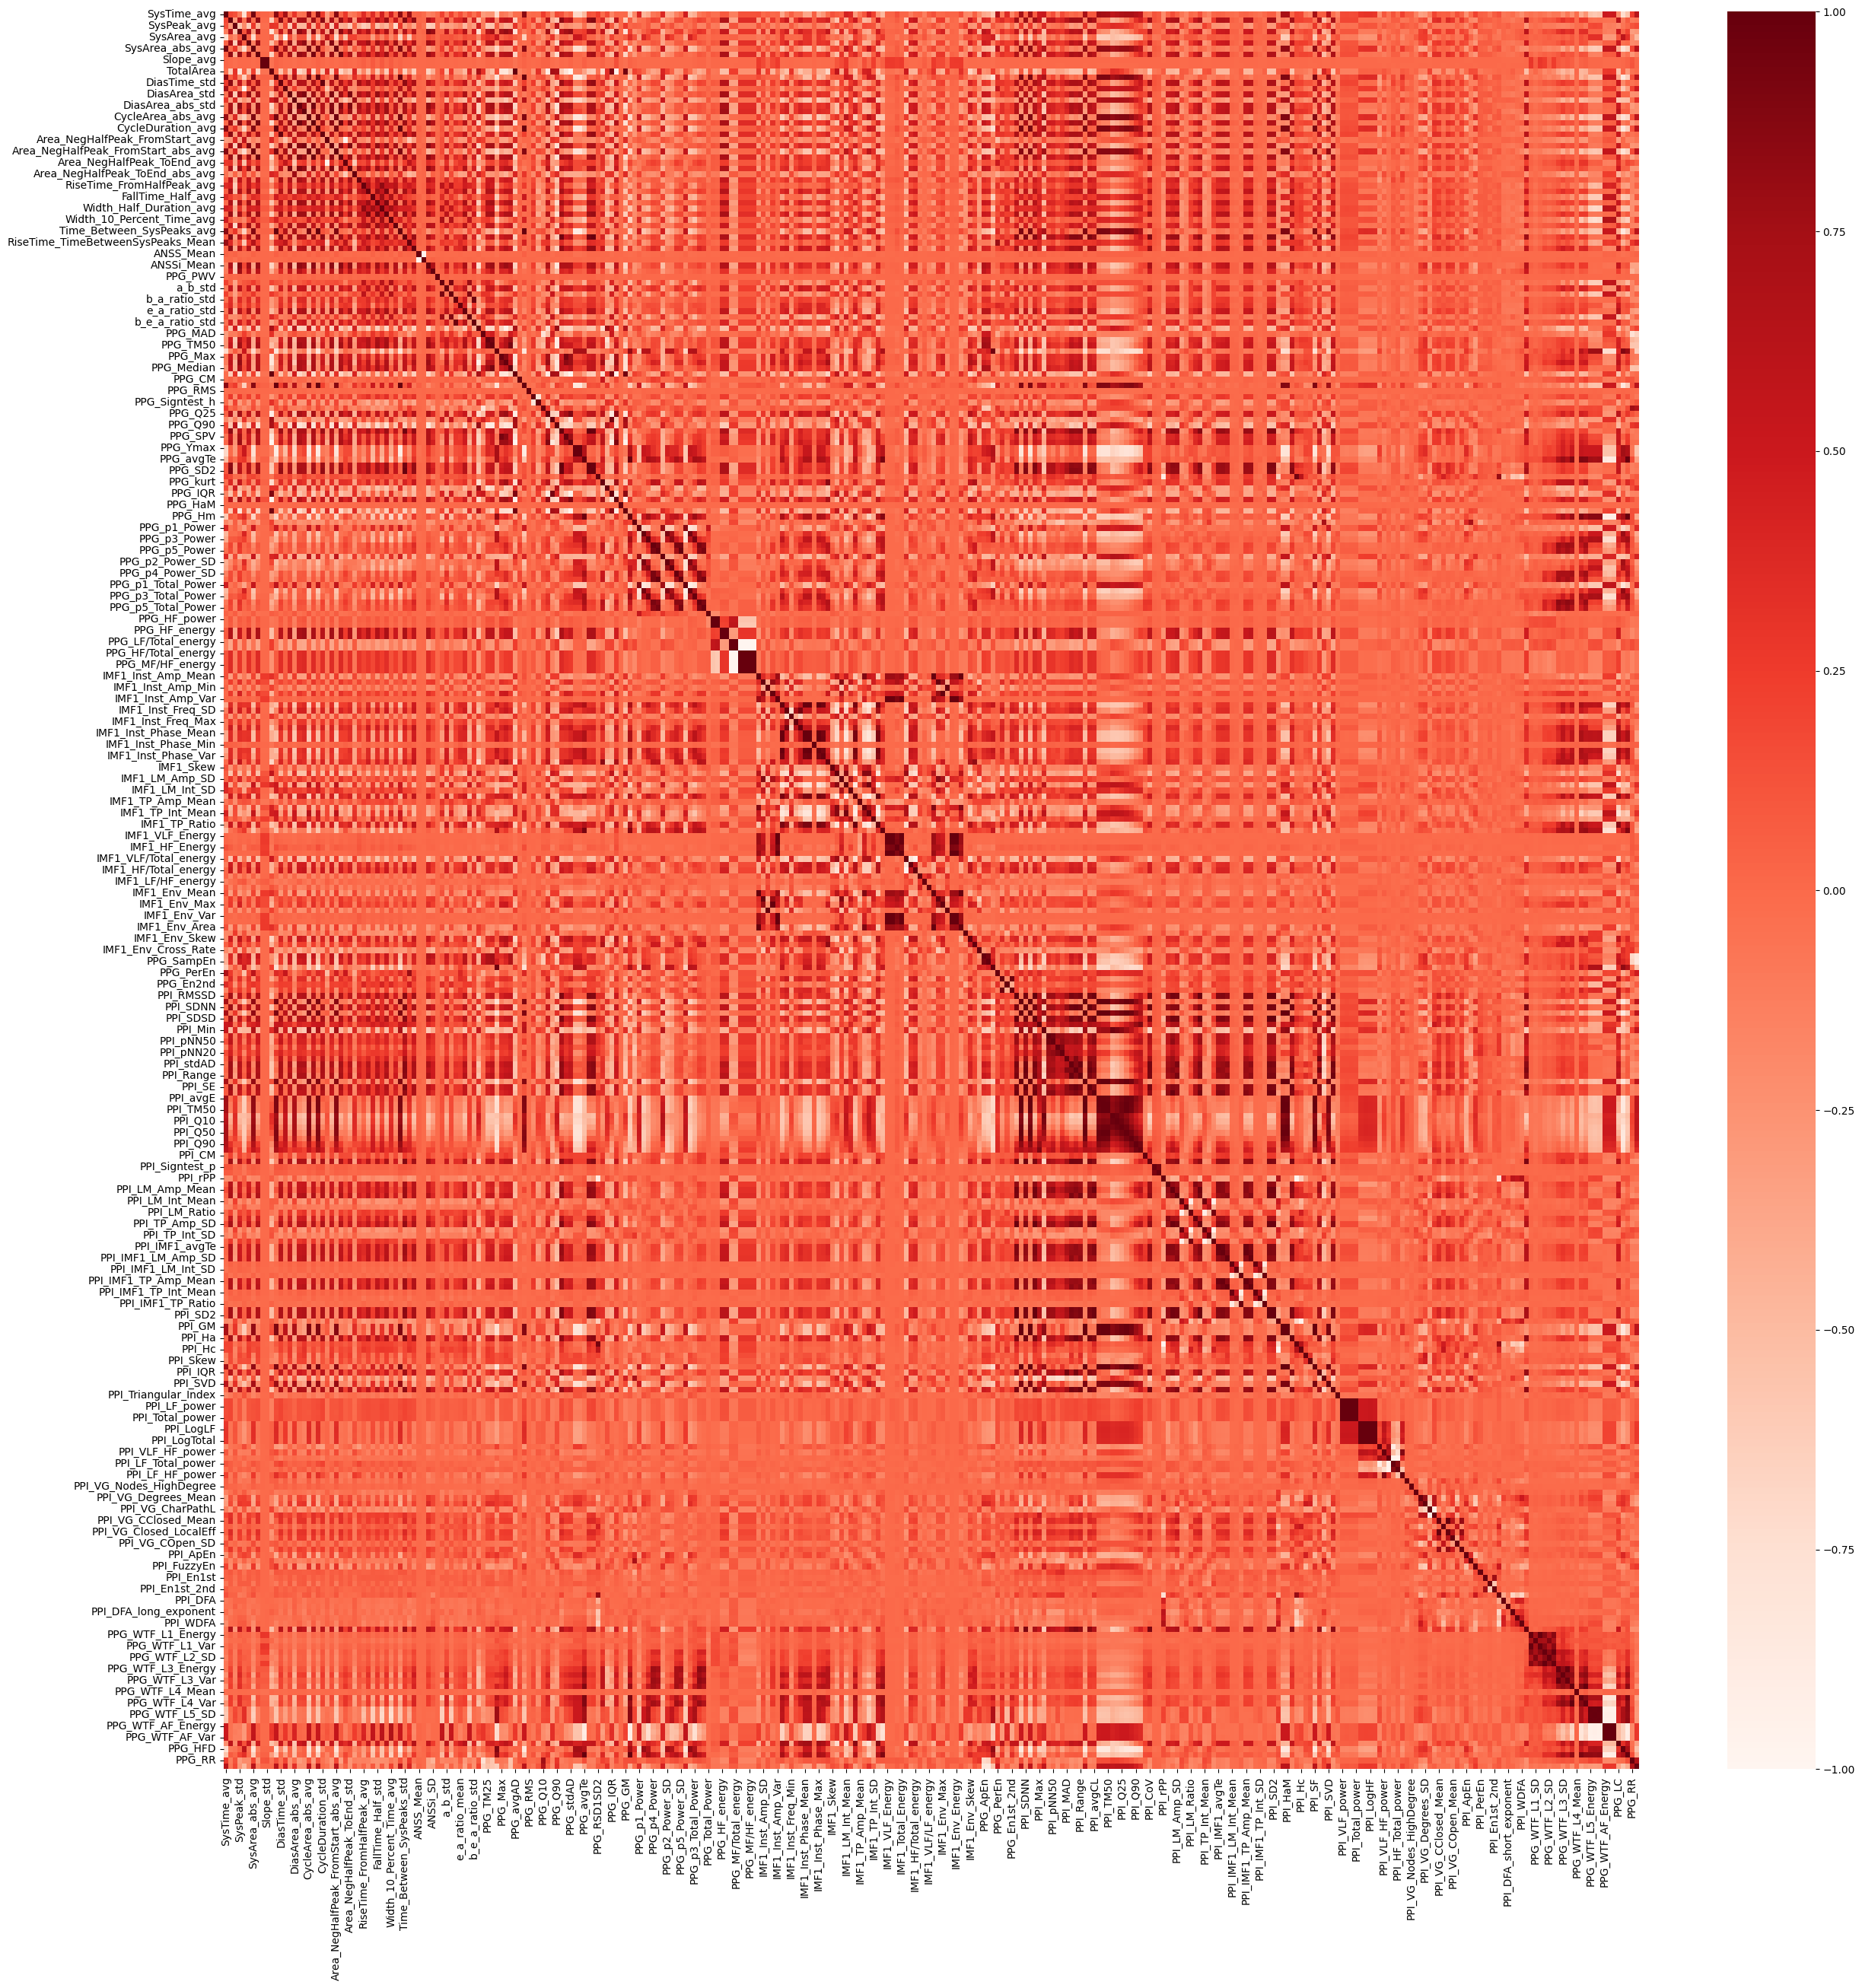

In [12]:
cor = features_imputed.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()


In [13]:
# Select upper triangle of correlation matrix
upper_tri = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

print("Columns to drop due to high correlation:", to_drop)


Columns to drop due to high correlation: ['Slope_std', 'CycleArea_abs_std', 'CycleDuration_avg', 'CycleDuration_std', 'Area_NegHalfPeak_FromStart_abs_avg', 'Area_NegHalfPeak_FromStart_abs_std', 'Time_Between_SysPeaks_avg', 'b_e_a_ratio_std', 'PPG_avgAD', 'PPG_RMSSD', 'PPG_Ymin', 'PPG_SD1', 'PPG_SD2', 'PPG_Hm', 'PPG_p5_Power_SD', 'PPG_Total_power2', 'PPG_Total_energy', 'PPG_MF/Total_energy', 'PPG_LF/HF_energy', 'PPG_MF/HF_energy', 'PPG_LF/MF_energy', 'IMF1_Inst_Freq_Var', 'IMF1_Inst_Phase_Mean', 'IMF1_Inst_Phase_SD', 'IMF1_Inst_Phase_Max', 'IMF1_Inst_Phase_Var', 'IMF1_TP_Ratio', 'IMF1_VLF_Energy', 'IMF1_LF_Energy', 'IMF1_Total_Energy', 'IMF1_Env_Mean', 'IMF1_Env_SD', 'IMF1_Env_Max', 'IMF1_Env_Min', 'IMF1_Env_Var', 'IMF1_Env_Energy', 'IMF1_Env_Area', 'PPG_FuzzyEn', 'PPG_En1st_2nd', 'PPI_Mean', 'PPI_SDSD', 'PPI_pNN50', 'PPI_stdAD', 'PPI_avgAD', 'PPI_Range', 'PPI_Median', 'PPI_SE', 'PPI_avgCL', 'PPI_avgE', 'PPI_TM25', 'PPI_TM50', 'PPI_Q5', 'PPI_Q10', 'PPI_Q25', 'PPI_Q50', 'PPI_Q75', 'PPI_C

In [14]:
# Drop these columns from the DataFrame
df_revised = df.drop(columns=to_drop)

In [15]:
# Check NaNs

nan_columns = df_revised.columns[df_revised.isna().any()].tolist()

print("Columns with NaN values:")
print(nan_columns)

nan_counts = df_revised.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts[nan_counts > 0])

# Calculate the threshold for 10% of the total number of rows
threshold = 0.02 * len(df_revised)

# Filter columns where the number of NaN values exceeds the threshold
nan_columns_2percent = nan_counts[nan_counts >= threshold]

# Print the columns with NaN values exceeding the threshold
print("Columns with NaN values exceeding 2% of the total data:")
print(nan_columns_2percent)


Columns with NaN values:
['Slope_avg', 'a_b_mean', 'a_b_std', 'b_a_ratio_mean', 'b_a_ratio_std', 'e_a_ratio_mean', 'e_a_ratio_std', 'b_e_a_ratio_mean', 'PPI_RMSSD', 'PPI_RMS', 'PPI_SDNN', 'PPI_Max', 'PPI_Min', 'PPI_NN50', 'PPI_NN20', 'PPI_pNN20', 'PPI_MAD', 'PPI_Q90', 'PPI_Q95', 'PPI_CM', 'PPI_Signtest_p', 'PPI_Normalitytest_h', 'PPI_rPP', 'PPI_avgTe', 'PPI_LM_Amp_SD', 'PPI_LM_Int_Mean', 'PPI_LM_Int_SD', 'PPI_LM_Ratio', 'PPI_TP_Amp_Mean', 'PPI_TP_Int_SD', 'PPI_TP_Ratio', 'PPI_IMF1_avgTe', 'PPI_IMF1_LM_Amp_SD', 'PPI_IMF1_LM_Int_Mean', 'PPI_IMF1_LM_Int_SD', 'PPI_IMF1_LM_Ratio', 'PPI_IMF1_TP_Int_SD', 'PPI_RSD1SD2', 'PPI_Ha', 'PPI_Hm', 'PPI_Hc', 'PPI_Kurt', 'PPI_Skew', 'PPI_IQR', 'PPI_CCM', 'PPI_SVD', 'PPI_Triangular_Index', 'PPI_VLF_power', 'PPI_LogVLF', 'PPI_VLF_LF_power', 'PPI_VLF_HF_power', 'PPI_VLF_Total_power', 'PPI_LF_Total_power', 'PPI_HF_Total_power', 'PPI_LF_HF_power', 'PPI_VG_Nodes_SmallDegree', 'PPI_VG_Nodes_HighDegree', 'PPI_VG_Slope_PowerLawFit', 'PPI_VG_Degrees_Mean', 'PPI_V

In [16]:
# Drop columns where more than 2% of data is NaNs
columns_to_drop = ['PPI_VG_Slope_PowerLawFit', 'PPI_VG_COpen_Mean', 'PPI_VG_COpen_SD']

# Drop the specified columns from the DataFrame
df_revised = df_revised.drop(columns=columns_to_drop)


In [ ]:
df_revised

,4_stages,SysTime_avg,SysTime_std,SysPeak_avg,SysPeak_std,SysArea_avg,SysArea_std,SysArea_abs_avg,SysArea_abs_std,Slope_avg,...,PPG_WTF_L3_SD,PPG_WTF_L4_Energy,PPG_WTF_L4_Mean,PPG_WTF_L4_SD,PPG_WTF_L5_Energy,PPG_WTF_AF_Energy,PPG_LC,PPG_HFD,PPG_RR,PPG_DET
0,0,0.243075,0.106977,2.051287,1.271953,-1.285312,14.791261,0.190149,0.285010,0.129524,...,0.073414,73.786172,0.002251,0.544357,469.265490,3326.216471,56.679685,1.596500,0.103262,0.916861
1,0,0.343277,0.225440,1.927268,1.754324,2.661957,17.248446,0.190526,0.227912,0.250397,...,0.171489,124.451367,0.015561,0.706797,986.855721,2731.753050,59.669821,1.481480,0.100278,0.961463
2,0,0.274200,0.101530,2.242864,1.318513,0.956881,15.603188,0.206661,0.128348,0.152634,...,0.065740,47.301892,0.003026,0.435842,452.286898,3424.140494,61.623213,1.512300,0.070013,0.889709
3,0,0.437240,0.398992,2.824896,1.867212,-1.905432,15.568619,0.304404,0.272068,0.299215,...,0.193904,357.419869,-0.028818,1.197743,748.970794,2720.494751,62.408353,1.531390,0.075477,0.864056
4,0,0.274282,0.135000,2.913433,0.555042,1.484555,19.700900,0.274228,0.189381,0.094563,...,0.054526,51.561563,-0.002476,0.455048,495.221854,3298.400148,56.876811,1.638568,0.066558,0.853705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85537,0,0.457332,0.147955,2.894850,0.439800,0.939364,7.744200,0.444941,0.150386,0.156556,...,0.038033,12.749257,0.005656,0.226207,291.749987,3568.318762,50.156012,1.312859,0.086904,0.944182
85538,0,0.418870,0.159254,2.790856,0.775927,3.364588,9.194997,0.412621,0.191717,0.245752,...,0.033554,14.531636,-0.000582,0.241577,238.542476,3596.889402,51.241862,1.329070,0.086235,0.943974
85539,0,0.418692,0.121094,2.838916,0.431103,3.748585,6.014400,0.411671,0.143435,0.145413,...,0.039415,13.286614,-0.001612,0.230992,255.100137,3622.677753,49.838657,1.319159,0.101377,0.951243
85540,0,0.412946,0.169847,2.848124,0.521313,2.600567,7.562719,0.405593,0.191824,0.140956,...,0.044691,13.945365,0.003660,0.236626,336.559393,3546.296684,50.857749,1.367742,0.084736,0.934705


# Prepare X and y

In [17]:
# Load subjects
df_subjects = pd.read_csv("path_to_subjects_df.csv")

# Merge
df_revised = df_revised.copy()
df_revised['SubjectID'] = df_subjects['SubjectID']

# Assuming you've already done data preparation up to scaling
# Drop the '4_stages' and 'Subject' columns to get the features
X = df_revised.drop(['4_stages', 'SubjectID'], axis=1) 

# Convert labels and subjects for later use
y = df_revised['4_stages']
groups = df_revised['SubjectID']


# RUS balancing

In [18]:
from imblearn.pipeline import Pipeline as ImblearnPipeline
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler

def resample_within_groups(X, y, groups):
    unique_groups = np.unique(groups)
    resampled_X, resampled_y, resampled_groups = [], [], []
    imputer = SimpleImputer(strategy='mean')  # Define the imputer

    for group in unique_groups:
        mask = groups == group
        X_g, y_g = X[mask], y[mask]

        # Impute missing values
        X_g = imputer.fit_transform(X_g)

        try:
            rus = RandomUnderSampler(random_state=42)
            X_resampled_g, y_resampled_g = rus.fit_resample(X_g, y_g)
        except ValueError:
            print(f"RUS failed for group {group}, using original samples.")
            X_resampled_g, y_resampled_g = X_g, y_g  # Fallback to original data

        resampled_X.append(pd.DataFrame(X_resampled_g, columns=X.columns))
        resampled_y.append(pd.Series(y_resampled_g))
        resampled_groups.extend([group] * len(y_resampled_g))

    return pd.concat(resampled_X, ignore_index=True), pd.concat(resampled_y, ignore_index=True), np.array(resampled_groups)

# Then you can call this function as before:
X_resampled, y_resampled, groups_resampled = resample_within_groups(X, y, groups)


In [ ]:
# Get classes in X_train
label_counts = y_resampled.value_counts()
print(label_counts)

4_stages
0    8190
1    8190
2    8190
3    8190
Name: count, dtype: int64


In [ ]:
# Get classes in X_train
label_counts = y.value_counts()
print(label_counts)

4_stages
1    34519
2    20428
0    16128
3    14467
Name: count, dtype: int64


# Feature Selection

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


sfm = SelectFromModel(estimator=RandomForestClassifier(n_estimators=100, random_state=42))
sfm.fit(X_resampled, y_resampled)

# Get the boolean mask indicating which features are selected
selected_features_mask = sfm.get_support()

# Get the names of the selected features from the original DataFrame
selected_features = X_resampled.columns[selected_features_mask]

print("Selected features:", selected_features)


Selected features: Index(['SysTime_avg', 'SysTime_std', 'SysPeak_avg', 'SysPeak_std',
       'SysArea_avg', 'SysArea_std', 'SysArea_abs_avg', 'SysArea_abs_std',
       'Slope_avg', 'TotalArea',
       ...
       'PPI_HFD', 'PPI_DFA_long_exponent', 'PPI_PDFA', 'PPI_WDFA',
       'PPG_WTF_L4_Energy', 'PPG_WTF_L4_SD', 'PPG_LC', 'PPG_HFD', 'PPG_RR',
       'PPG_DET'],
      dtype='object', length=111)


In [21]:
X_selected = X_resampled[selected_features]
X_selected

,SysTime_avg,SysTime_std,SysPeak_avg,SysPeak_std,SysArea_avg,SysArea_std,SysArea_abs_avg,SysArea_abs_std,Slope_avg,TotalArea,...,PPI_HFD,PPI_DFA_long_exponent,PPI_PDFA,PPI_WDFA,PPG_WTF_L4_Energy,PPG_WTF_L4_SD,PPG_LC,PPG_HFD,PPG_RR,PPG_DET
0,0.243075,0.106977,2.051287,1.271953,-1.285312,14.791261,0.190149,0.285010,0.129524,20.185956,...,1.840314,0.643539,1.408947,1.041127,73.786172,0.544357,56.679685,1.596500,0.103262,0.916861
1,0.343277,0.225440,1.927268,1.754324,2.661957,17.248446,0.190526,0.227912,0.250397,18.963432,...,1.670130,0.841074,0.518060,1.191702,124.451367,0.706797,59.669821,1.481480,0.100278,0.961463
2,0.274200,0.101530,2.242864,1.318513,0.956881,15.603188,0.206661,0.128348,0.152634,22.063562,...,1.935544,0.426304,0.171287,0.566286,47.301892,0.435842,61.623213,1.512300,0.070013,0.889709
3,0.437240,0.398992,2.824896,1.867212,-1.905432,15.568619,0.304404,0.272068,0.299215,21.087311,...,1.842306,0.873746,0.499770,0.691065,357.419869,1.197743,62.408353,1.531390,0.075477,0.864056
4,0.274282,0.135000,2.913433,0.555042,1.484555,19.700900,0.274228,0.189381,0.094563,25.268359,...,1.902181,0.608242,0.976507,1.272573,51.561563,0.455048,56.876811,1.638568,0.066558,0.853705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32755,0.409598,0.161856,2.779713,0.556937,2.794175,8.161561,0.398708,0.195274,0.143079,25.457833,...,2.046295,0.429506,0.419967,0.541854,15.943494,0.253040,49.714330,1.342336,0.086039,0.939421
32756,0.407924,0.180552,2.843130,0.436726,3.764476,6.137564,0.391921,0.168041,0.140289,25.379892,...,1.935204,0.381899,0.771164,1.019350,14.880416,0.244443,49.435375,1.358866,0.078836,0.928423
32757,0.442419,0.181819,2.878130,0.405570,3.186255,8.046523,0.425947,0.162467,0.151923,25.565984,...,2.078094,0.464905,0.747794,0.693862,13.421065,0.232162,49.513925,1.326756,0.087218,0.941216
32758,0.433160,0.148427,2.842621,0.466751,2.494186,6.366794,0.420283,0.167045,0.149057,25.505711,...,2.068778,0.550226,0.279725,0.559280,12.280122,0.222076,49.657028,1.326426,0.087186,0.942385


# Hyperparameter tuning

In [ ]:
from sklearn.model_selection import train_test_split, GroupKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer, matthews_corrcoef

# Split your data into a smaller subset for quick exploration
X_sample, _, y_sample, _, groups_sample, _ = train_test_split(X_selected, y_resampled, groups_resampled, test_size=0.5, random_state=42, stratify = y_resampled)

# Initialize the pipeline with the steps
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameters for RandomizedSearchCV, ensuring they're prefixed according to the pipeline steps
param_dist_rf = {
    'classifier__n_estimators': sp_randint(100, 500),
    'classifier__max_depth': [None] + list(range(3, 20)),
    'classifier__min_samples_split': sp_randint(2, 11),
    'classifier__min_samples_leaf': sp_randint(1, 11),
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}

# Define the GroupKFold cross-validator
gkf = GroupKFold(n_splits=3)

# Define MCC as the scoring metric using make_scorer
mcc_scorer = make_scorer(matthews_corrcoef)

# Set up RandomizedSearchCV with the pipeline
random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,  # Use the pipeline as the estimator
    param_distributions=param_dist_rf,
    n_iter=100,  # Adjust based on computational resources
    scoring=mcc_scorer,  # Choose an appropriate scoring method
    n_jobs=-1,  # Use all available cores
    cv=gkf.split(X_sample, y_sample, groups_sample),  # Ensure GroupKFold uses group information
    verbose=3,
    random_state=42,
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_sample, y_sample)

# After fitting, output the best parameters and score
print("Best parameters found: ", random_search_rf.best_params_)
print("Best score: ", random_search_rf.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'classifier__bootstrap': False, 'classifier__max_depth': 4, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 3, 'classifier__n_estimators': 443}
Best score:  0.1372376804241516


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid based on the results of random search
param_grid_rf = {
    'classifier__bootstrap': [False, True],
    'classifier__max_depth': [3, 4],
    'classifier__max_features': ['sqrt'],
    'classifier__min_samples_leaf': [4, 5, 6],
    'classifier__min_samples_split': [2, 3, 4],
    'classifier__n_estimators': [300, 443, 500]
}

# Set up GridSearchCV with the pipeline
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    scoring=mcc_scorer,
    n_jobs=-1,
    cv=gkf.split(X_selected, y_resampled, groups=groups_resampled),
    verbose=3
)

# Fit GridSearchCV
grid_search_rf.fit(X_selected, y_resampled)

# Output the best parameters and score from grid search
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'classifier__bootstrap': True, 'classifier__max_depth': 4, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 6, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 500}
Best score:  0.13558154810028447


# Model Training

## 5-fold CV

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Define your classifier with the best parameters found
rf_classifier = RandomForestClassifier(
    bootstrap=True,
    max_depth=4,
    max_features='sqrt',
    min_samples_leaf=6,
    min_samples_split=2,
    n_estimators=500,
    random_state=42
)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 5 for a 5-stage classifier
n_classes = 4

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_5cv = np.zeros((4, 4), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_5cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)

    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)


# Convert the metrics dictionary to a DataFrame
metrics_df_5cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_5cv = metrics_df_5cv.mean()
metrics_std_5cv = metrics_df_5cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_5cv)
print(metrics_std_5cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_5cv)


Test set distribution: 4_stages
0    1646
1    1646
2    1646
3    1646
Name: count, dtype: int64
Test set distribution: 4_stages
0    1644
1    1644
2    1644
3    1644
Name: count, dtype: int64
Test set distribution: 4_stages
0    1628
1    1628
2    1628
3    1628
Name: count, dtype: int64
Test set distribution: 4_stages
0    1636
1    1636
2    1636
3    1636
Name: count, dtype: int64
Test set distribution: 4_stages
0    1636
1    1636
2    1636
3    1636
Name: count, dtype: int64
Accuracy       0.347422
Sensitivity    0.347422
Specificity    0.782474
Precision      0.347422
F1 Score       0.347422
MCC            0.138647
dtype: float64
Accuracy       0.008181
Sensitivity    0.008181
Specificity    0.002727
Precision      0.008181
F1 Score       0.008181
MCC            0.011459
dtype: float64
Final Confusion Matrix:
 [[3407   51 2310 2422]
 [1585  100 3258 3247]
 [1441   90 3947 2712]
 [1553  109 2601 3927]]


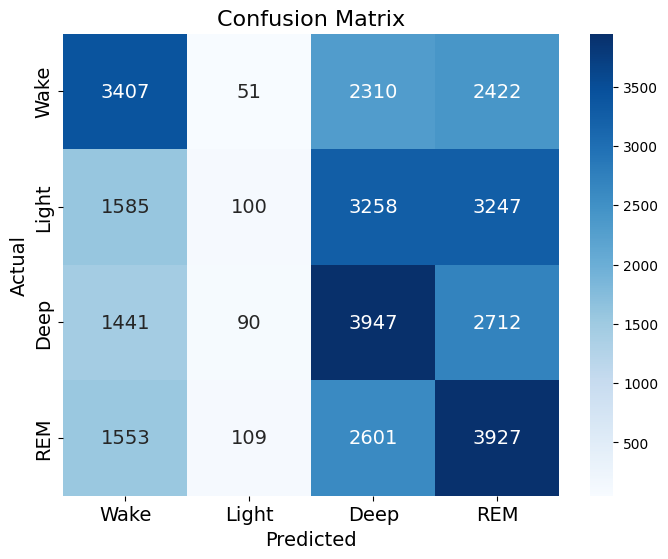

In [ ]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_5cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'Light', 'Deep', 'REM'], yticklabels=['Wake', 'Light', 'Deep', 'REM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

### Feature importances

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Define the number of classes
n_classes = 4

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [ ]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv5 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances[0],
    'Class 1 Importances': average_importances[1],
    'Class 2 Importances': average_importances[2],
    'Class 3 Importances': average_importances[3]
})

# Adding a column for the overall importance (mean)
importances_df_cv5['Overall Importance (Mean)'] = importances_df_cv5[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances', 'Class 3 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv5

,Feature,Class 0 Importances,Class 1 Importances,Class 2 Importances,Class 3 Importances,Overall Importance (Mean)
0,SysTime_avg,0.002962,0.013101,0.005284,0.014855,0.009050
1,SysTime_std,0.005231,0.004995,0.011198,0.005862,0.006821
2,SysPeak_avg,0.008416,0.005513,0.004090,0.005831,0.005963
3,SysPeak_std,0.004166,0.003448,0.009037,0.018217,0.008717
4,SysArea_avg,0.001367,0.006934,0.009416,0.008810,0.006632
...,...,...,...,...,...,...
106,PPG_WTF_L4_SD,0.006433,0.005177,0.003500,0.004923,0.005008
107,PPG_LC,0.072646,0.013748,0.003013,0.042521,0.032982
108,PPG_HFD,0.006084,0.023960,0.008148,0.007328,0.011380
109,PPG_RR,0.004190,0.010782,0.013861,0.009575,0.009602


## 10-fold CV

In [ ]:
# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=10)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 3 for a 3-stage classifier
n_classes = 4

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_10cv = np.zeros((4, 4), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_10cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)

    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)


# Convert the metrics dictionary to a DataFrame
metrics_df_10cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_10cv = metrics_df_10cv.mean()
metrics_std_10cv = metrics_df_10cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_10cv)
print(metrics_std_10cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_10cv)


Test set distribution: 4_stages
0    815
1    815
2    815
3    815
Name: count, dtype: int64
Test set distribution: 4_stages
0    812
1    812
2    812
3    812
Name: count, dtype: int64
Test set distribution: 4_stages
0    823
1    823
2    823
3    823
Name: count, dtype: int64
Test set distribution: 4_stages
0    813
1    813
2    813
3    813
Name: count, dtype: int64
Test set distribution: 4_stages
0    831
1    831
2    831
3    831
Name: count, dtype: int64
Test set distribution: 4_stages
0    817
1    817
2    817
3    817
Name: count, dtype: int64
Test set distribution: 4_stages
0    821
1    821
2    821
3    821
Name: count, dtype: int64
Test set distribution: 4_stages
0    811
1    811
2    811
3    811
Name: count, dtype: int64
Test set distribution: 4_stages
0    830
1    830
2    830
3    830
Name: count, dtype: int64
Test set distribution: 4_stages
0    817
1    817
2    817
3    817
Name: count, dtype: int64
Accuracy       0.349697
Sensitivity    0.349697
Specificity 

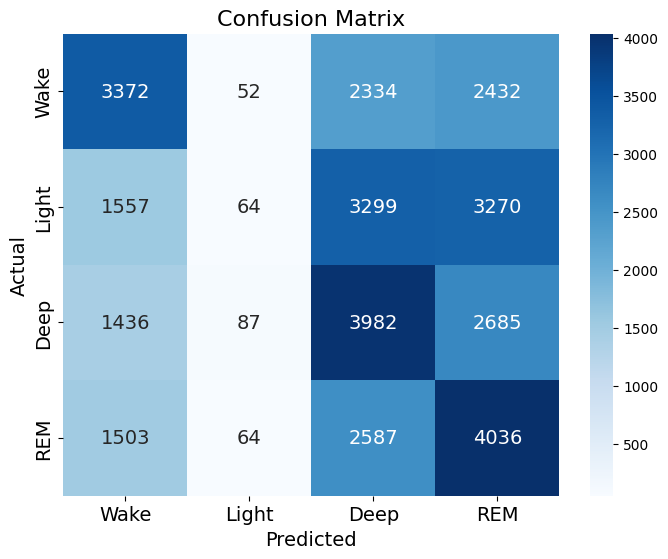

In [ ]:
# Plot confusion matrix
cm = final_confusion_matrix_10cv

plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'Light', 'Deep', 'REM'], yticklabels=['Wake', 'Light', 'Deep', 'REM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

### Feature importances

In [ ]:
# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=10)

# Define the number of classes
n_classes = 4

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances_cv10 = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [ ]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv10 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances_cv10[0],
    'Class 1 Importances': average_importances_cv10[1],
    'Class 2 Importances': average_importances_cv10[2],
    'Class 3 Importances': average_importances_cv10[3]
})

# Adding a column for the overall importance (mean)
importances_df_cv10['Overall Importance (Mean)'] = importances_df_cv10[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances', 'Class 3 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv10

,Feature,Class 0 Importances,Class 1 Importances,Class 2 Importances,Class 3 Importances,Overall Importance (Mean)
0,SysTime_avg,0.002567,0.012960,0.004225,0.013699,0.008363
1,SysTime_std,0.005180,0.004836,0.011684,0.006257,0.006989
2,SysPeak_avg,0.007900,0.005587,0.003797,0.005200,0.005621
3,SysPeak_std,0.004264,0.003072,0.009314,0.018959,0.008902
4,SysArea_avg,0.001105,0.004936,0.009009,0.008104,0.005789
...,...,...,...,...,...,...
106,PPG_WTF_L4_SD,0.006642,0.005088,0.003705,0.004643,0.005019
107,PPG_LC,0.076339,0.015025,0.002923,0.044233,0.034630
108,PPG_HFD,0.005489,0.025436,0.007310,0.006681,0.011229
109,PPG_RR,0.004048,0.010909,0.013542,0.009091,0.009397


# 20-fold CV

In [ ]:
# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=20)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 3 for a 3-stage classifier
n_classes = 4

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_20cv = np.zeros((4, 4), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_20cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)

    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)


# Convert the metrics dictionary to a DataFrame
metrics_df_20cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_20cv = metrics_df_20cv.mean()
metrics_std_20cv = metrics_df_20cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_20cv)
print(metrics_std_20cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_20cv)


Test set distribution: 4_stages
0    406
1    406
2    406
3    406
Name: count, dtype: int64
Test set distribution: 4_stages
0    405
1    405
2    405
3    405
Name: count, dtype: int64
Test set distribution: 4_stages
0    411
1    411
2    411
3    411
Name: count, dtype: int64
Test set distribution: 4_stages
0    404
1    404
2    404
3    404
Name: count, dtype: int64
Test set distribution: 4_stages
0    412
1    412
2    412
3    412
Name: count, dtype: int64
Test set distribution: 4_stages
0    403
1    403
2    403
3    403
Name: count, dtype: int64
Test set distribution: 4_stages
0    404
1    404
2    404
3    404
Name: count, dtype: int64
Test set distribution: 4_stages
0    397
1    397
2    397
3    397
Name: count, dtype: int64
Test set distribution: 4_stages
0    403
1    403
2    403
3    403
Name: count, dtype: int64
Test set distribution: 4_stages
0    402
1    402
2    402
3    402
Name: count, dtype: int64
Test set distribution: 4_stages
0    422
1    422
2    422
3

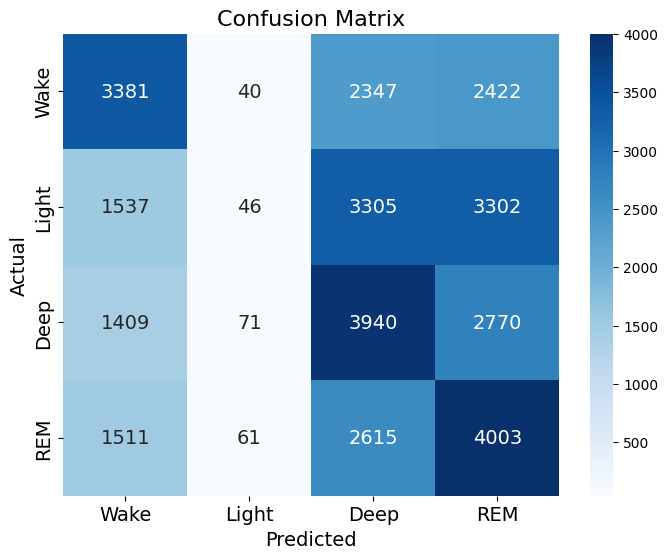

In [ ]:
# Plot confusion matrix
cm = final_confusion_matrix_20cv

plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'Light', 'Deep', 'REM'], yticklabels=['Wake', 'Light', 'Deep', 'REM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

### Feature importances

In [ ]:
# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=20)

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances_cv20 = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [ ]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv20 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances_cv20[0],
    'Class 1 Importances': average_importances_cv20[1],
    'Class 2 Importances': average_importances_cv20[2],
    'Class 3 Importances': average_importances_cv20[3]
})

# Adding a column for the overall importance (mean)
importances_df_cv20['Overall Importance (Mean)'] = importances_df_cv20[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances', 'Class 3 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv20


# Overall feature importances

In [ ]:
# Assuming importances_df_cv10, importances_df_cv5, importances_df_cv20 are already defined
# Step 1: Merge the dataframes on the 'Feature' column
merged_df = pd.merge(importances_df_cv10, importances_df_cv5, on='Feature', suffixes=('_cv10', '_cv5'))
merged_df = pd.merge(merged_df, importances_df_cv20, on='Feature')

# Step 2: Calculate the average importance for each class across the three validation methods
merged_df['Class 0 Average'] = merged_df[['Class 0 Importances_cv10', 'Class 0 Importances_cv5', 'Class 0 Importances']].mean(axis=1)
merged_df['Class 1 Average'] = merged_df[['Class 1 Importances_cv10', 'Class 1 Importances_cv5', 'Class 1 Importances']].mean(axis=1)
merged_df['Class 2 Average'] = merged_df[['Class 2 Importances_cv10', 'Class 2 Importances_cv5', 'Class 2 Importances']].mean(axis=1)
merged_df['Class 3 Average'] = merged_df[['Class 3 Importances_cv10', 'Class 2 Importances_cv5', 'Class 3 Importances']].mean(axis=1)

# Step 3: Calculate the overall mean importance from the averages of each class
merged_df['Overall Importance (Mean)'] = merged_df[['Class 0 Average', 'Class 1 Average', 'Class 2 Average', 'Class 3 Average']].mean(axis=1)

# Optionally, create a DataFrame to view or export just the features and their importances
final_df = merged_df[['Feature', 'Class 0 Average', 'Class 1 Average', 'Class 2 Average', 'Class 3 Average', 'Overall Importance (Mean)']]
final_df

,Feature,Class 0 Average,Class 1 Average,Class 2 Average,Class 3 Average,Overall Importance (Mean)
0,SysTime_avg,0.002670,0.012990,0.004527,0.010609,0.007699
1,SysTime_std,0.005204,0.004897,0.011636,0.008139,0.007469
2,SysPeak_avg,0.008077,0.005485,0.003795,0.004899,0.005564
3,SysPeak_std,0.004269,0.003207,0.009033,0.015321,0.007957
4,SysArea_avg,0.001178,0.005769,0.009267,0.008336,0.006137
...,...,...,...,...,...,...
106,PPG_WTF_L4_SD,0.006564,0.005118,0.003576,0.004197,0.004863
107,PPG_LC,0.075692,0.014046,0.002946,0.030875,0.030890
108,PPG_HFD,0.005698,0.025371,0.007625,0.006987,0.011420
109,PPG_RR,0.004034,0.010696,0.013674,0.010838,0.009810


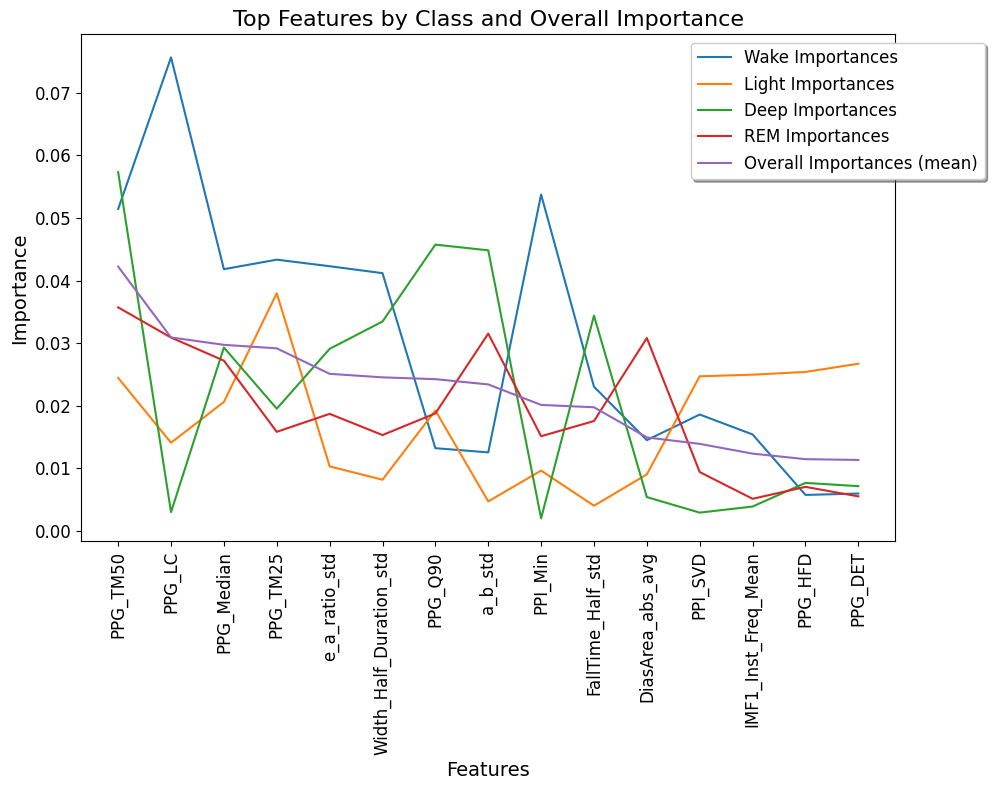

In [ ]:
# Top 10 for each class
top_class_0 = final_df.nlargest(5, 'Class 0 Average')['Feature']
top_class_1 = final_df.nlargest(5, 'Class 1 Average')['Feature']
top_class_2 = final_df.nlargest(5, 'Class 2 Average')['Feature']
top_class_3 = final_df.nlargest(5, 'Class 3 Average')['Feature']
top_overall = final_df.nlargest(5, 'Overall Importance (Mean)')['Feature']

# Combine and deduplicate the lists of top features
top_features = pd.concat([top_class_0, top_class_1, top_class_2, top_class_3, top_overall]).drop_duplicates()

# Filter the DataFrame to only include the top features
filtered_df = final_df[final_df['Feature'].isin(top_features)]

# Sort the DataFrame by 'Overall Importance (Mean)' in descending order for plotting
filtered_df = filtered_df.sort_values(by='Overall Importance (Mean)', ascending=False)

# Melt the DataFrame for easier plotting
melted_df = pd.melt(filtered_df, id_vars=['Feature'], var_name='Class', value_name='Importance')

# Plotting
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
lineplot = sns.lineplot(data=melted_df, x='Feature', y='Importance', hue='Class')

# Customize the x-axis with feature names
plt.xticks(rotation=90, fontsize=12)  # Rotate the x labels for better readability
plt.yticks(fontsize=12)

plt.title('Top Features by Class and Overall Importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.grid(False)

# Customizing legend labels
handles, labels = lineplot.get_legend_handles_labels()
new_labels = ['Wake Importances' if label == 'Class 0 Average' else label for label in labels]
new_labels = ['Light Importances' if label == 'Class 1 Average' else label for label in new_labels]
new_labels = ['Deep Importances' if label == 'Class 2 Average' else label for label in new_labels]
new_labels = ['REM Importances' if label == 'Class 3 Average' else label for label in new_labels]
new_labels = ['Overall Importances (mean)' if 'Mean' in label else label for label in new_labels]  # Rename overall if used

plt.legend(handles=handles, labels=new_labels, loc='upper right', bbox_to_anchor=(1.12, 1), fontsize=12, frameon=True, shadow=True, fancybox=True)
plt.tight_layout()
plt.show()


In [ ]:
# Select the top 5 features for each class and overall
top_features_class_0 = final_df.nlargest(5, 'Class 0 Average')
top_features_class_1 = final_df.nlargest(5, 'Class 1 Average')
top_features_class_2 = final_df.nlargest(5, 'Class 2 Average')
top_features_class_3 = final_df.nlargest(5, 'Class 3 Average')
top_features_overall = final_df.nlargest(5, 'Overall Importance (Mean)')

# Reset index to get the feature names in a column (if they are set as the index)
top_features_class_0 = top_features_class_0.reset_index()
top_features_class_1 = top_features_class_1.reset_index()
top_features_class_2 = top_features_class_2.reset_index()
top_features_overall = top_features_overall.reset_index()

# Combine the DataFrames and melt for plotting
top_features_combined = pd.concat([
    top_features_class_0.assign(Class='Wake').melt(id_vars=['Feature', 'Class'], value_vars=['Class 0 Average'], value_name='Importance'),
    top_features_class_1.assign(Class='Light').melt(id_vars=['Feature', 'Class'], value_vars=['Class 1 Average'], value_name='Importance'),
    top_features_class_2.assign(Class='Deep').melt(id_vars=['Feature', 'Class'], value_vars=['Class 2 Average'], value_name='Importance'),
    top_features_class_3.assign(Class='REM').melt(id_vars=['Feature', 'Class'], value_vars=['Class 3 Average'], value_name='Importance'),
    top_features_overall.assign(Class='Overall').melt(id_vars=['Feature', 'Class'], value_vars=['Overall Importance (Mean)'], value_name='Importance')
])


# Map overall importance to each feature
overall_importance_map = top_features_overall.set_index('Feature')['Overall Importance (Mean)'].to_dict()
top_features_combined['Overall Importance (Mean)'] = top_features_combined['Feature'].map(overall_importance_map)

# Sort the DataFrame by 'Overall Importance (Mean)' in descending order
top_features_combined_sorted = top_features_combined.sort_values(by='Overall Importance (Mean)', ascending=False)

# Print sorted DataFrame
top_features_combined_sorted



,Feature,Class,variable,Importance,Overall Importance (Mean)
2,PPG_TM50,Wake,Class 0 Average,0.051441,0.042224
0,PPG_TM50,Deep,Class 2 Average,0.057333,0.042224
0,PPG_TM50,REM,Class 3 Average,0.035703,0.042224
0,PPG_TM50,Overall,Overall Importance (Mean),0.042224,0.042224
0,PPG_LC,Wake,Class 0 Average,0.075692,0.030890
2,PPG_LC,REM,Class 3 Average,0.030875,0.030890
1,PPG_LC,Overall,Overall Importance (Mean),0.030890,0.030890
4,PPG_Median,REM,Class 3 Average,0.027176,0.029710
2,PPG_Median,Overall,Overall Importance (Mean),0.029710,0.029710
3,PPG_TM25,Wake,Class 0 Average,0.043332,0.029146


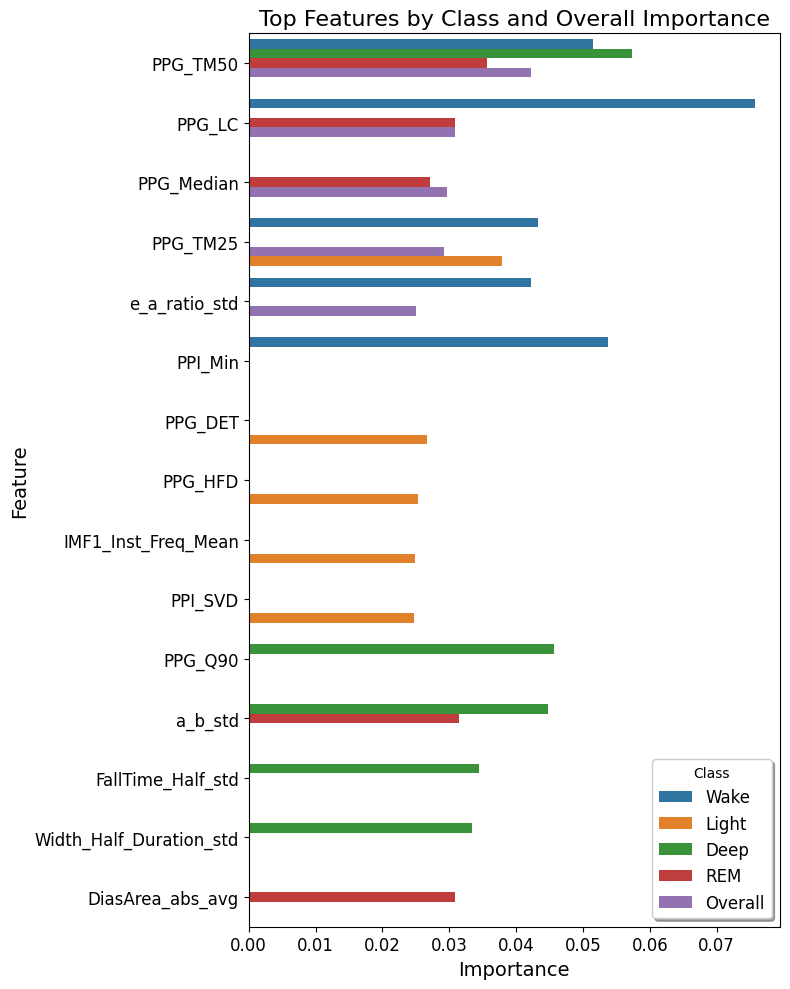

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting with the combined DataFrame
# Define the custom palette using seaborn's "deep" palette
deep_palette = sns.color_palette()
custom_palette = {
    'Wake': deep_palette[0],  # Blue
    'Light': deep_palette[1],  # Orange
    'Deep': deep_palette[2],  # Green
    'REM': deep_palette[3],  # Red
    'Overall': deep_palette[4]  # Purple
}

plt.figure(figsize=(8, 10))
barplot = sns.barplot(
    data=top_features_combined_sorted,
    x='Importance',
    y='Feature',
    hue='Class',
    palette=custom_palette
)
# Improve the aesthetics and legibility of the plot
plt.title('Top Features by Class and Overall Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust the legend to match the desired order and colors
handles, labels = barplot.get_legend_handles_labels()
desired_order = ['Wake', 'Light', 'Deep', 'REM', 'Overall']
ordered_handles = [handles[labels.index(lbl)] for lbl in desired_order]

# Create a new legend with the desired order and colors
plt.legend(ordered_handles, desired_order, title='Class', fontsize=12, frameon=True, shadow=True, fancybox=True)

plt.tight_layout()
plt.show()

In [ ]:
feature_names = top_features_combined_sorted['Feature'].unique()

In [ ]:
feature_names

array(['PPG_TM50', 'PPG_LC', 'PPG_Median', 'PPG_TM25', 'e_a_ratio_std',
       'PPI_Min', 'PPG_DET', 'PPG_HFD', 'IMF1_Inst_Freq_Mean', 'PPI_SVD',
       'PPG_Q90', 'a_b_std', 'FallTime_Half_std',
       'Width_Half_Duration_std', 'DiasArea_abs_avg'], dtype=object)

In [ ]:
top_features = X_resampled[['PPG_TM50', 'PPG_LC', 'PPG_Median', 'PPG_TM25', 'e_a_ratio_std',
       'PPI_Min', 'PPG_DET', 'PPG_HFD', 'IMF1_Inst_Freq_Mean', 'PPI_SVD',
       'PPG_Q90', 'a_b_std', 'FallTime_Half_std',
       'Width_Half_Duration_std', 'DiasArea_abs_avg']]

<ipython-input-15-4c4f0f4bb792>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['class'] = y_resampled  # Add the class labels


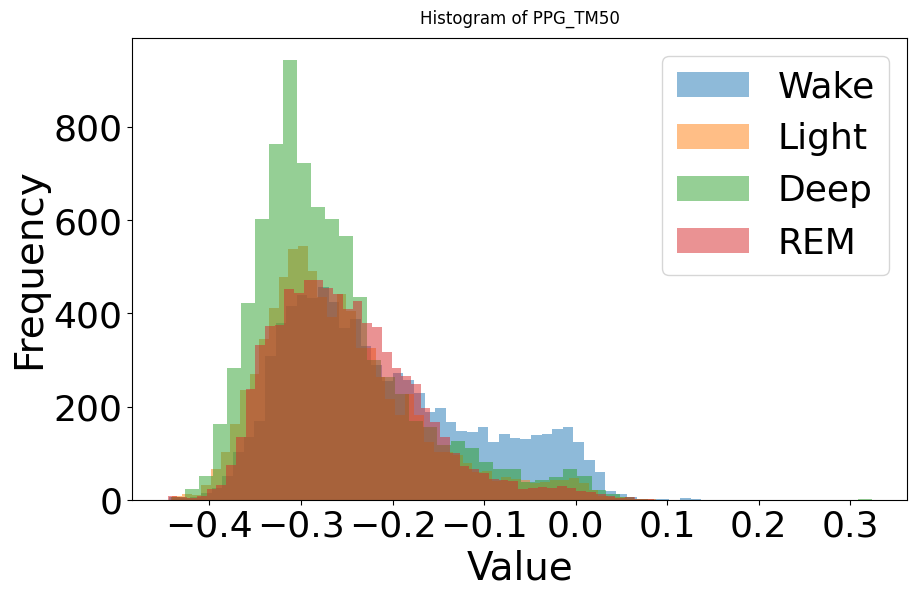

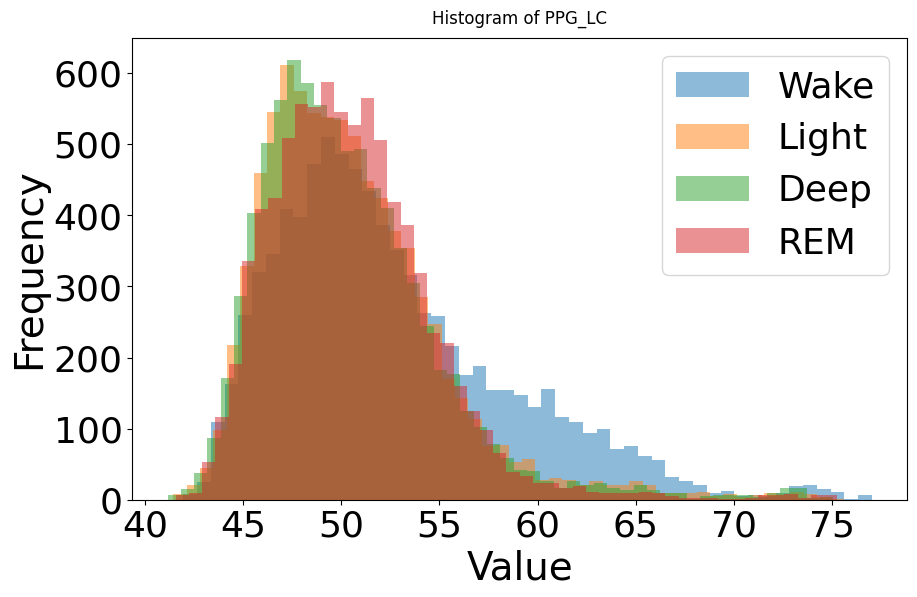

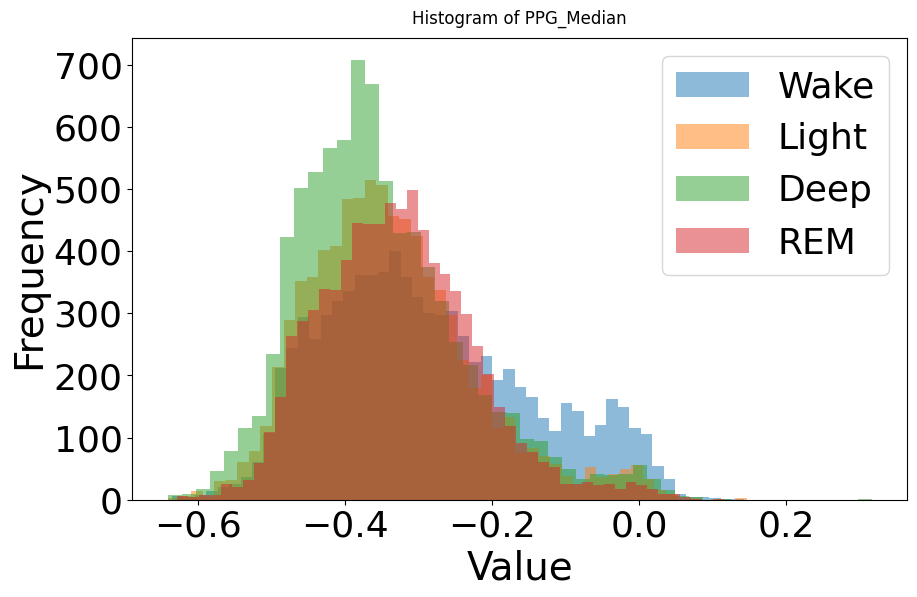

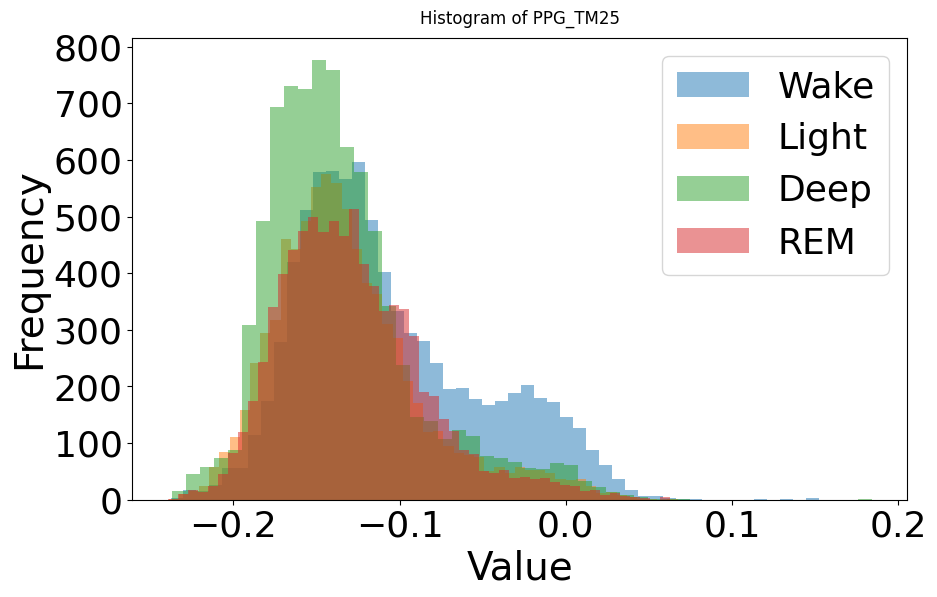

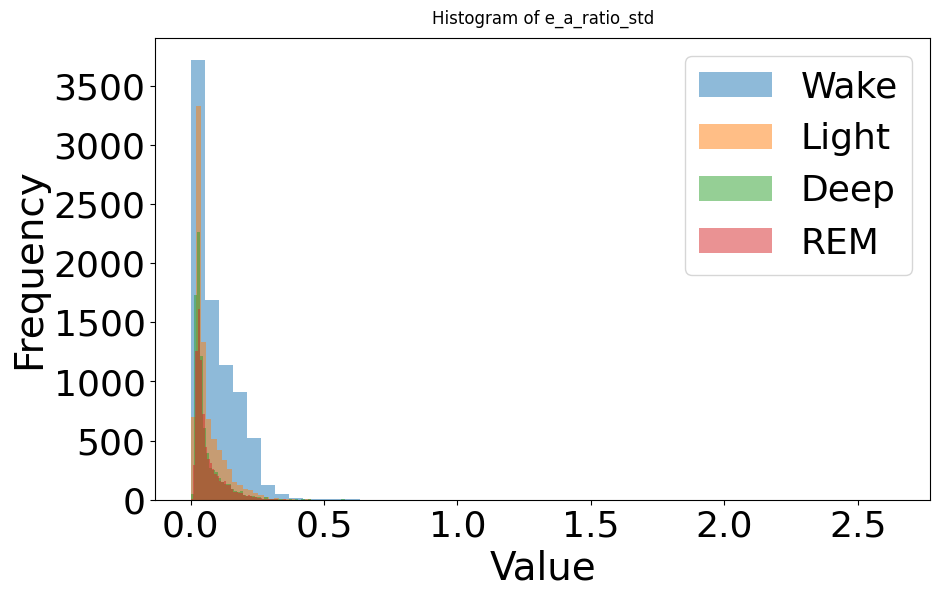

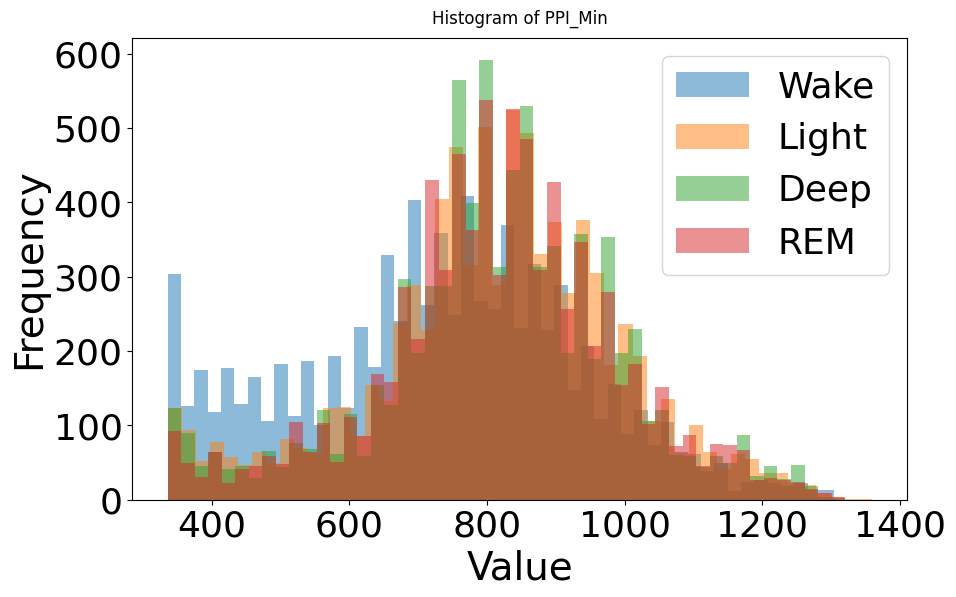

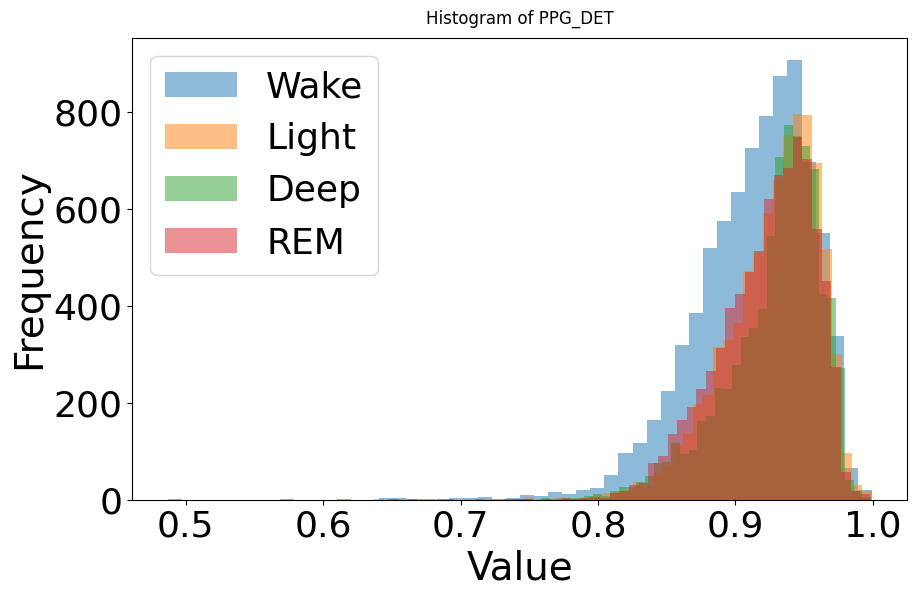

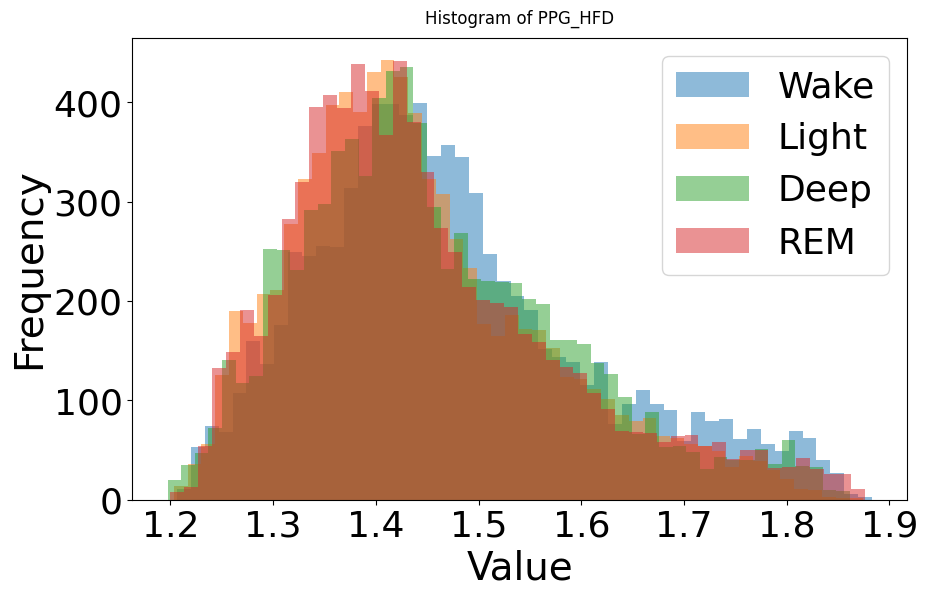

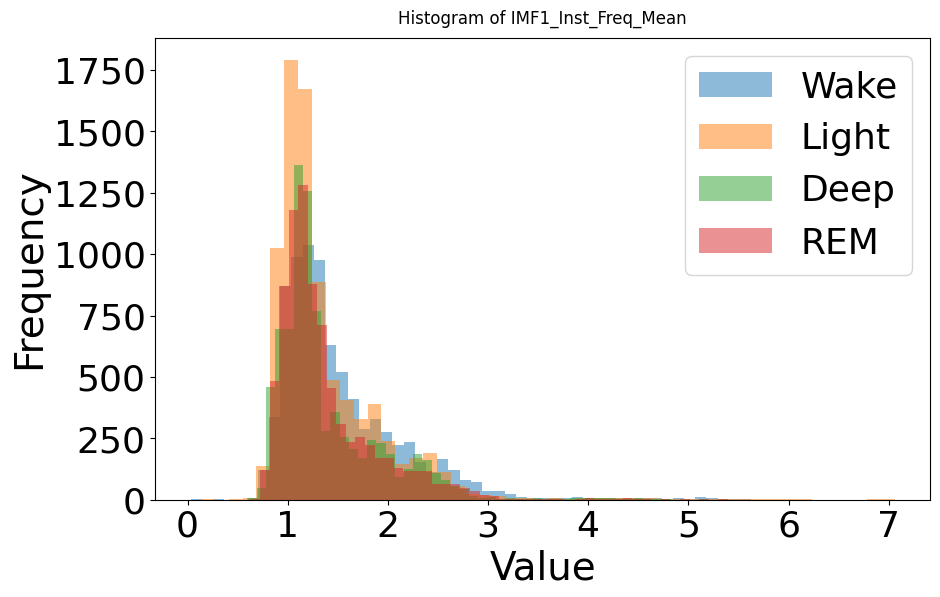

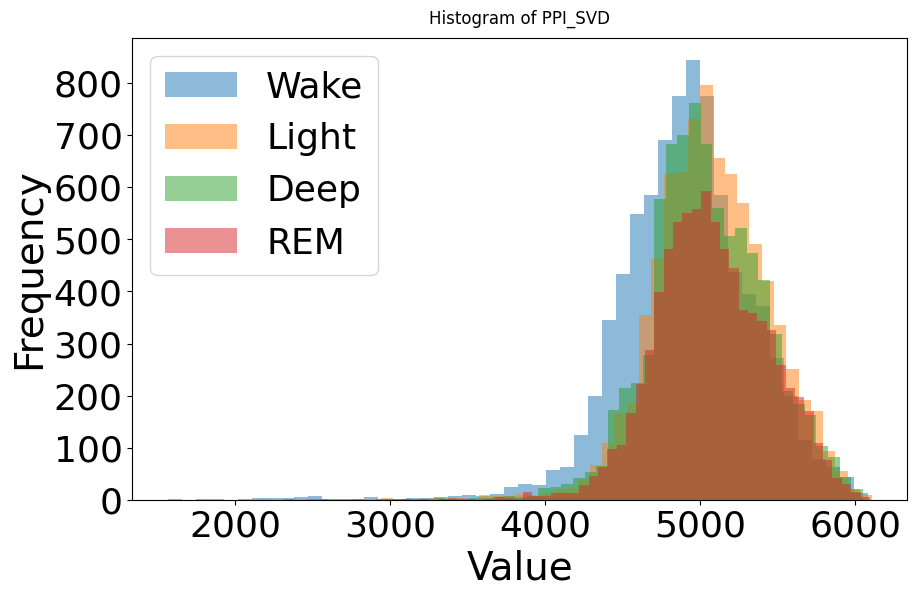

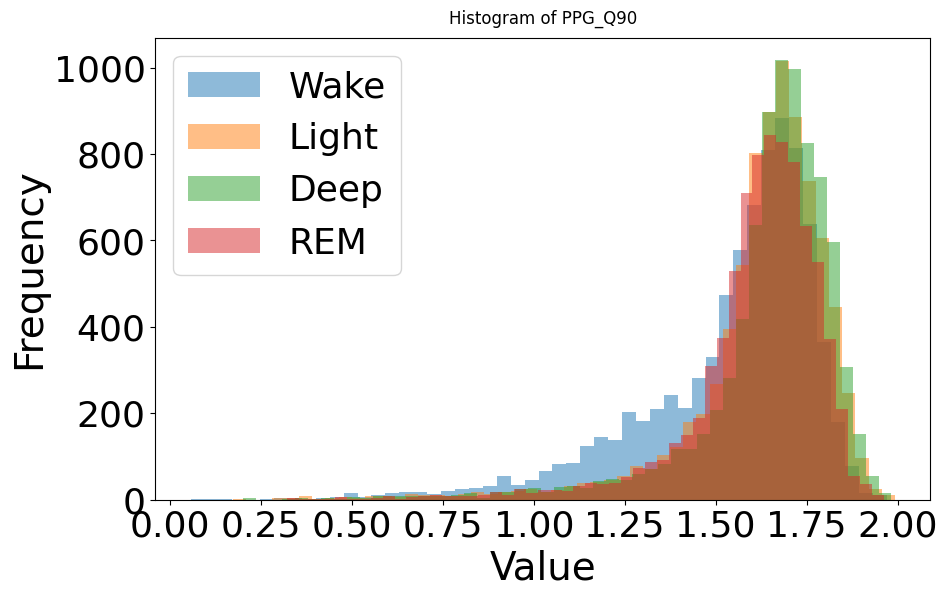

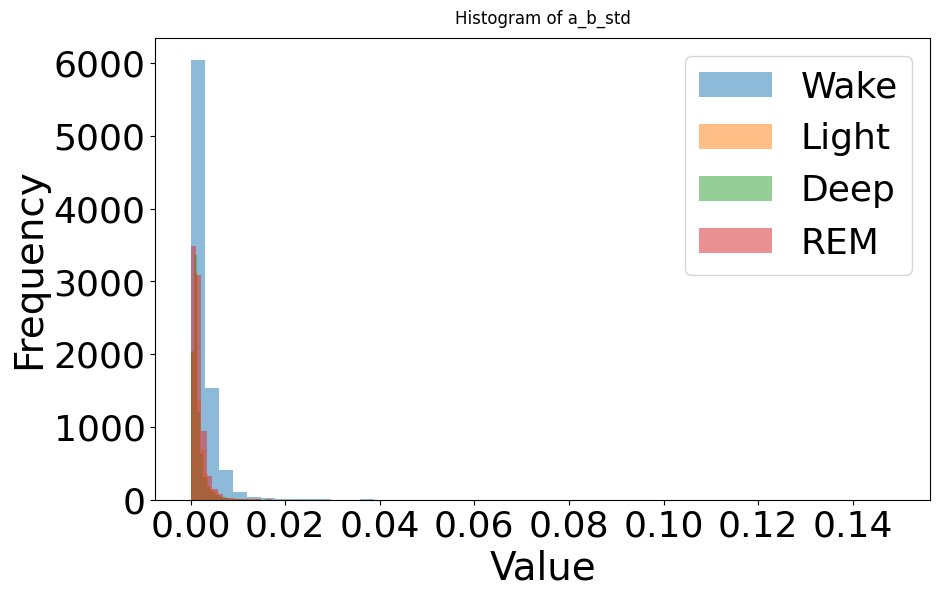

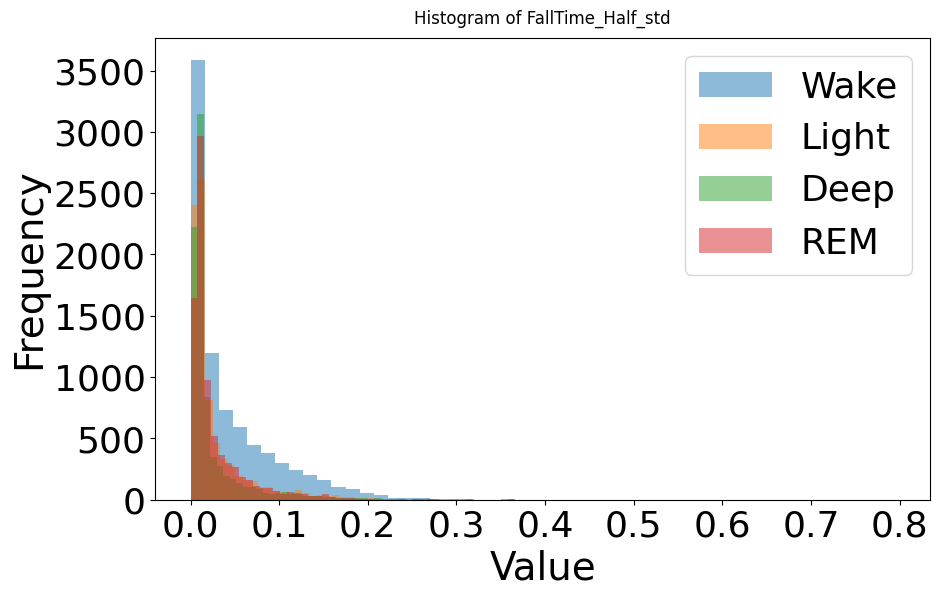

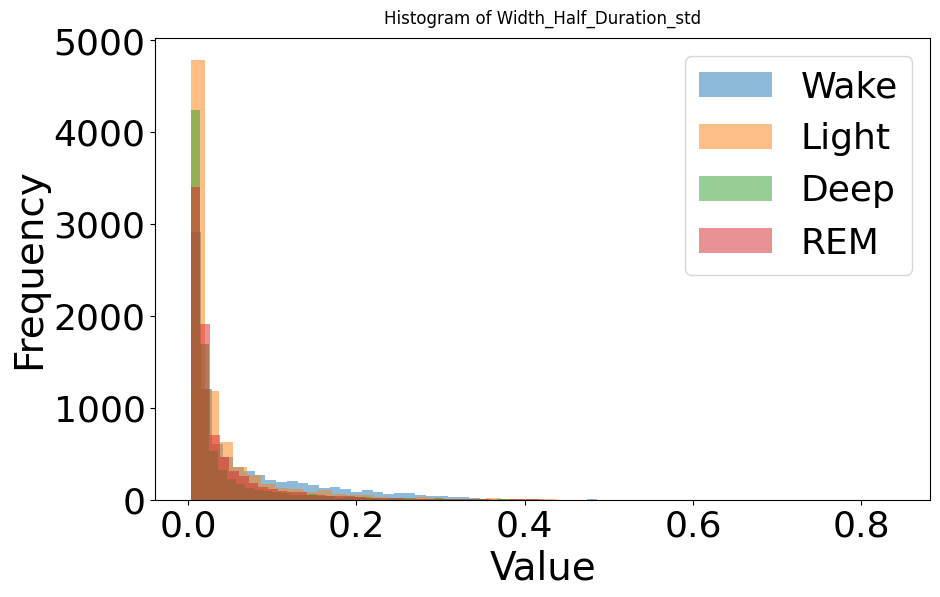

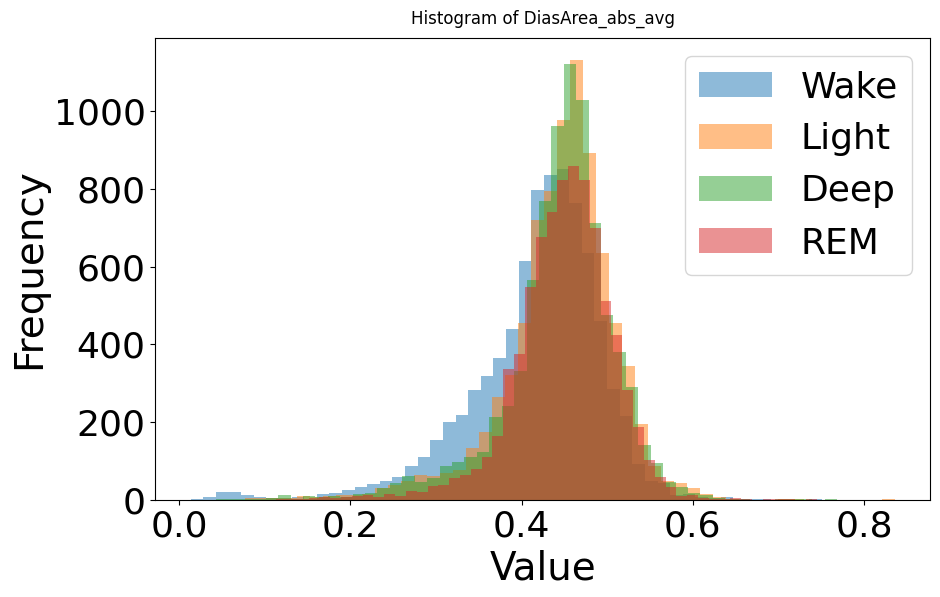

In [ ]:
# Define a dictionary to map class values to sleep stages
class_labels = {
    0: "Wake",
    1: "Light",
    2: "Deep",
    3: "REM"
}

# Plot histograms for each feature
# Assuming 'top_features' DataFrame and 'y_resampled' Series are already defined
top_features['class'] = y_resampled  # Add the class labels

# Exclude the 'class' column when getting feature names
feature_names = top_features.drop(columns='class').columns

for feature in feature_names:
    plt.figure(figsize=(10, 6))
    # Get unique class values from the 'class' column
    for class_value in np.unique(top_features['class']):
        # Subset the data for the current class
        subset = top_features[top_features['class'] == class_value]
        # Plot histogram and use the class_labels dictionary to get the correct label
        plt.hist(subset[feature], bins=50, alpha=0.5, label=class_labels[class_value])
    plt.title(f'Histogram of {feature}', pad = 10)
    plt.xlabel('Value', fontsize = 28)
    plt.ylabel('Frequency', fontsize = 28)
    plt.xticks (fontsize = 26)
    plt.yticks (fontsize = 26)
    plt.legend(fontsize = 26)
    plt.show()


<ipython-input-14-30a68d323048>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['class'] = top_features['class'].map(class_mapping)


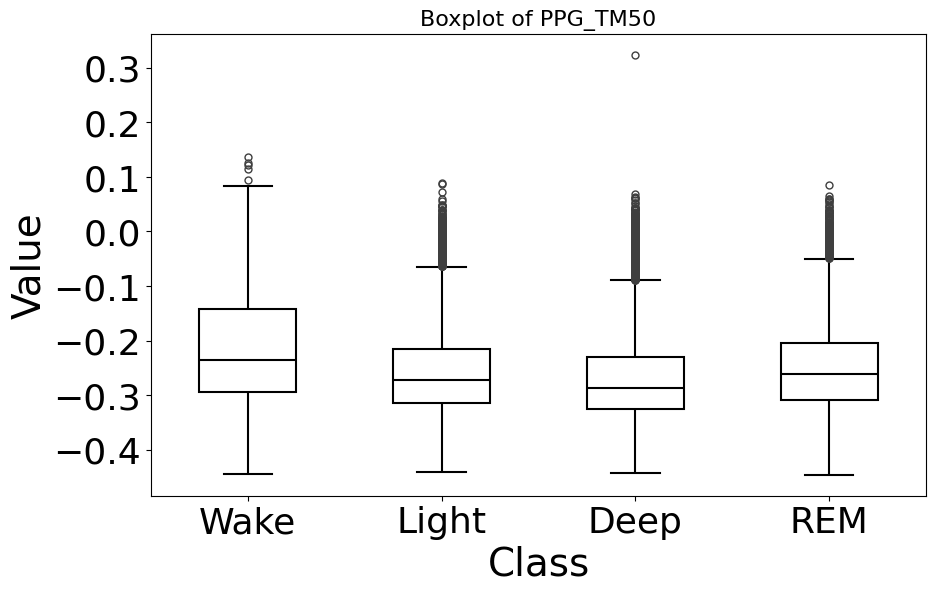

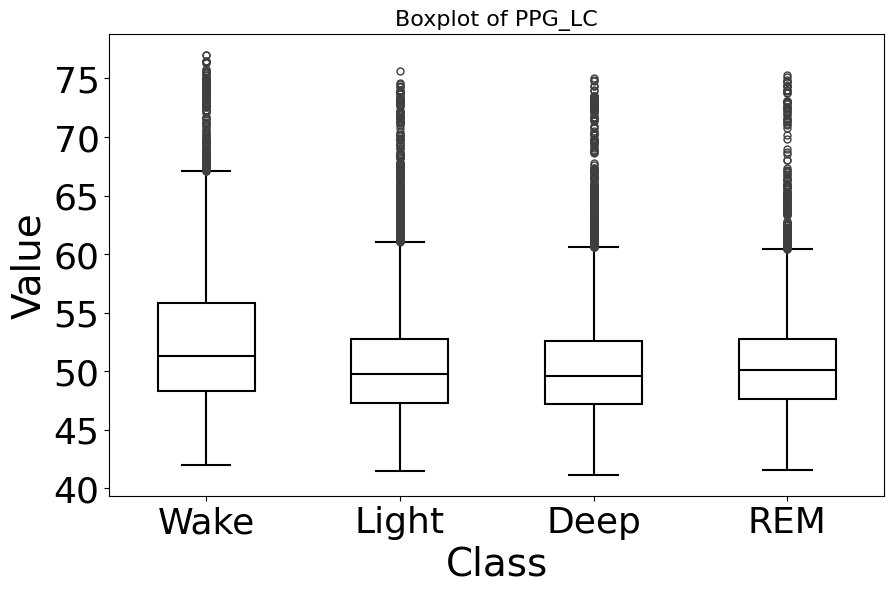

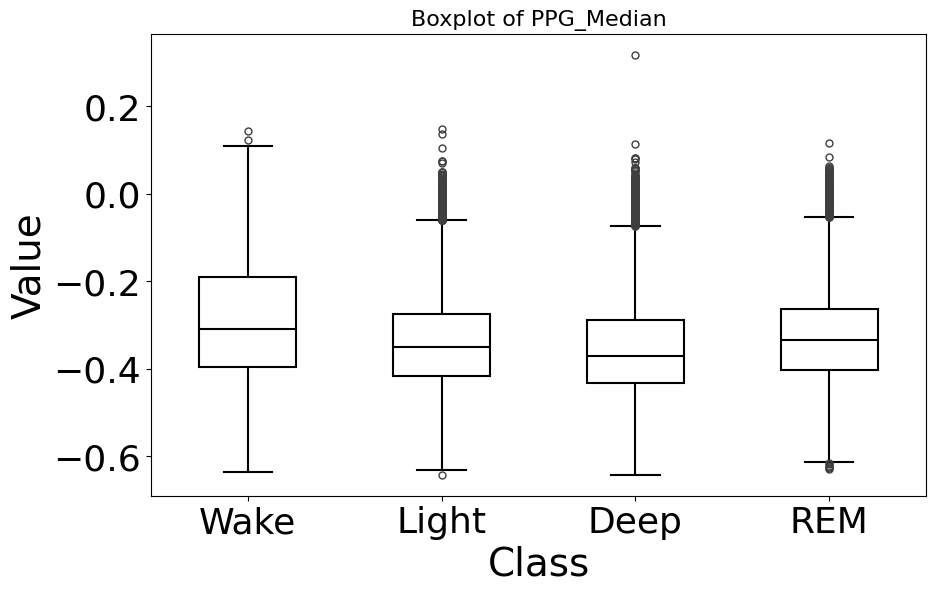

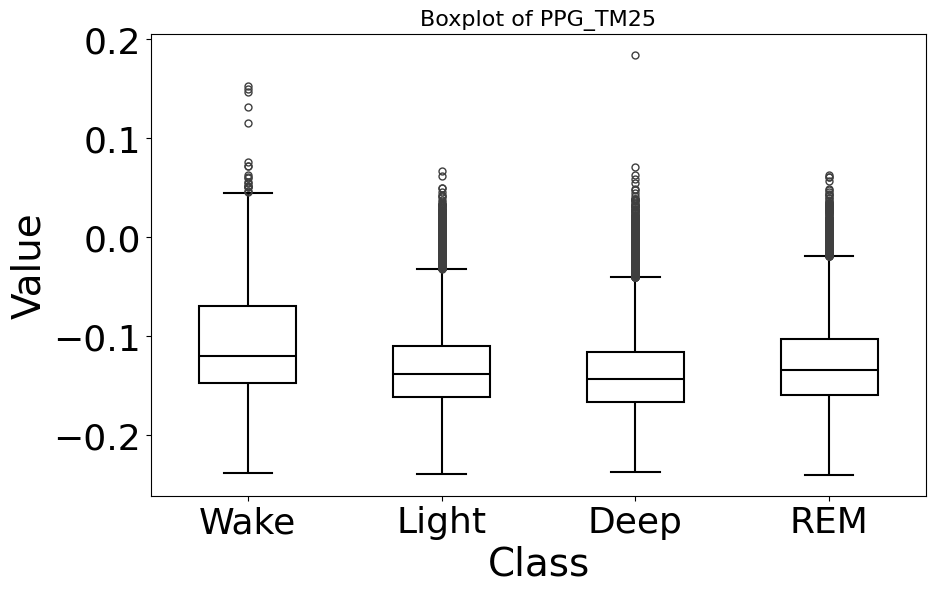

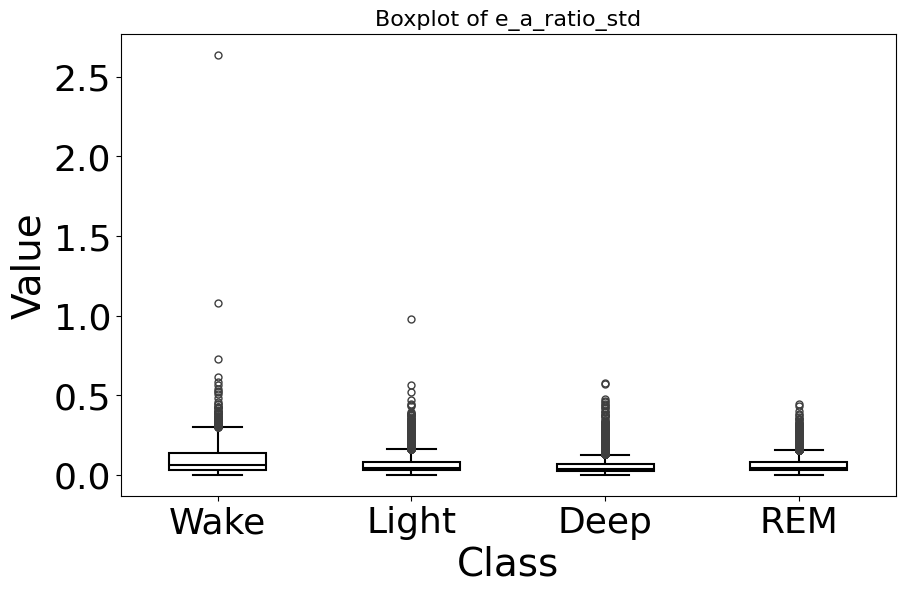

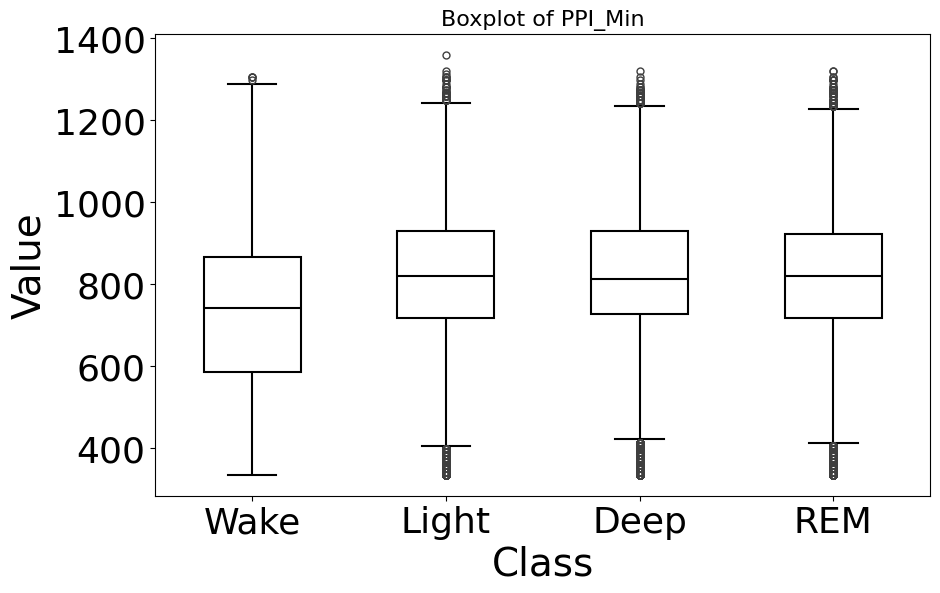

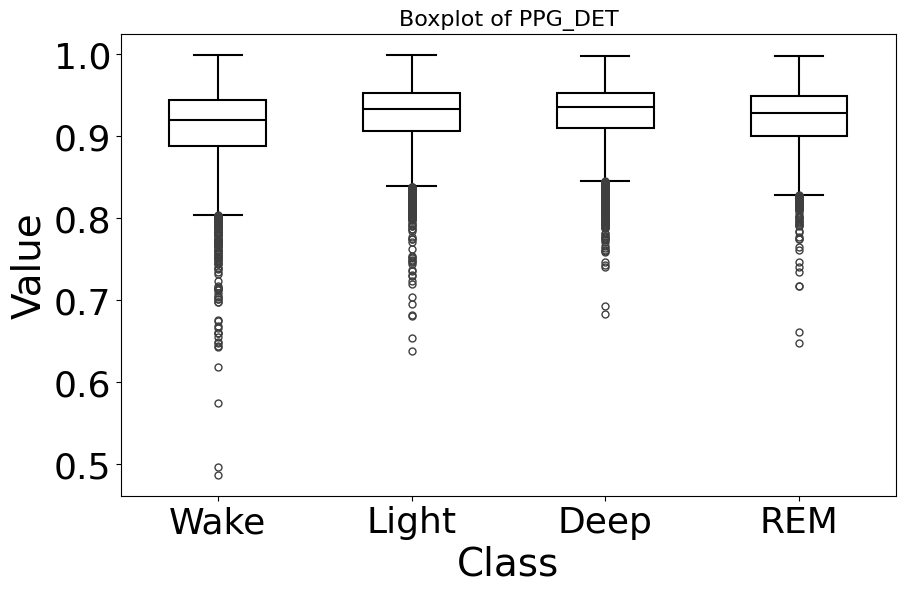

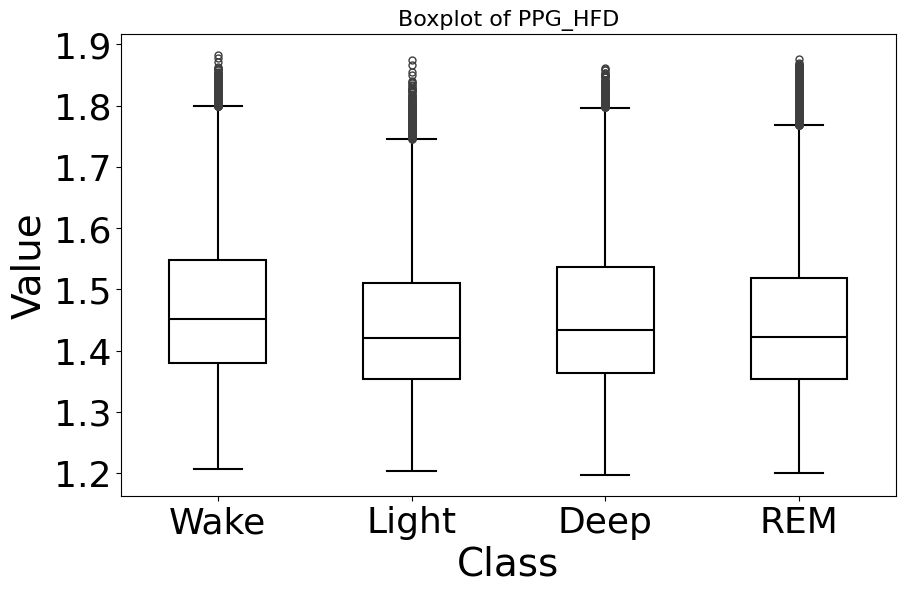

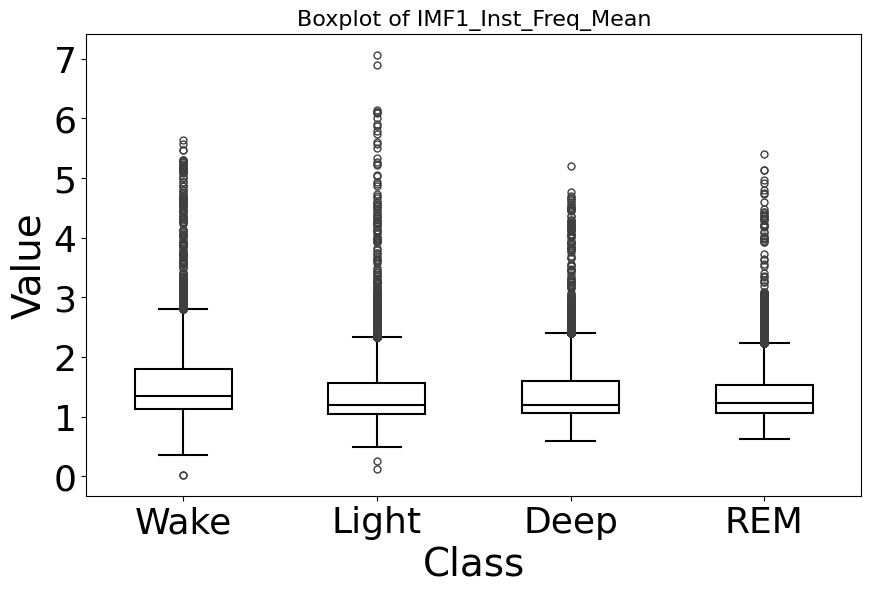

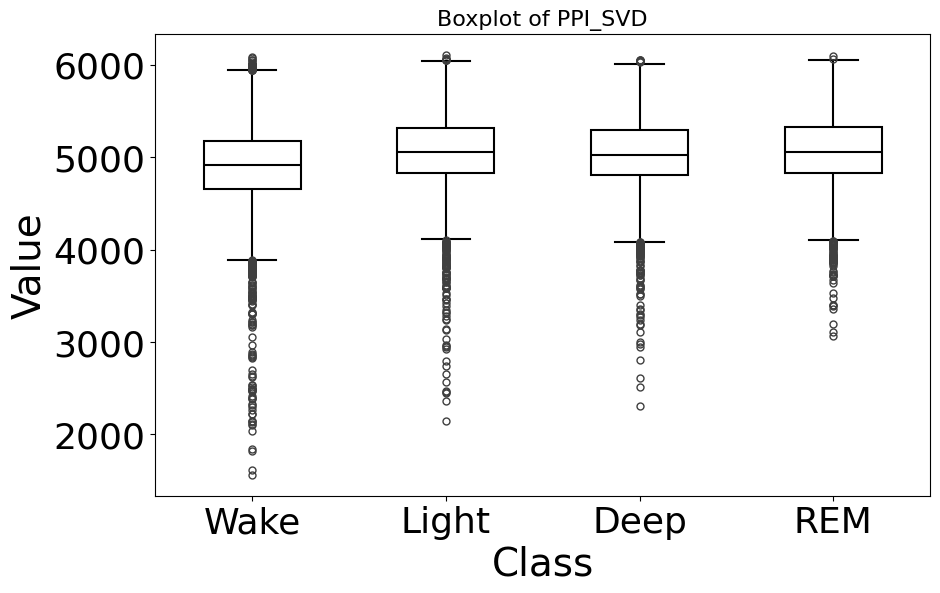

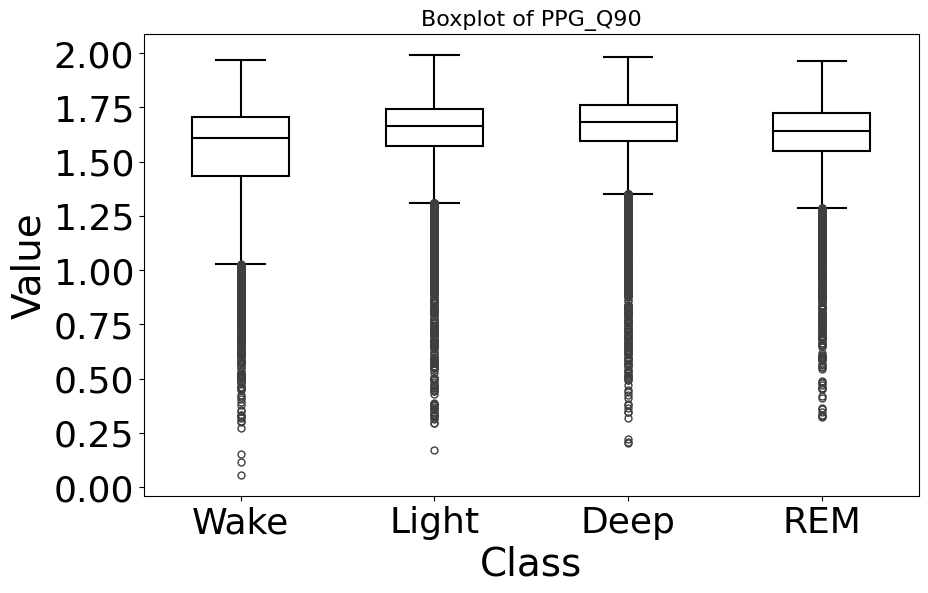

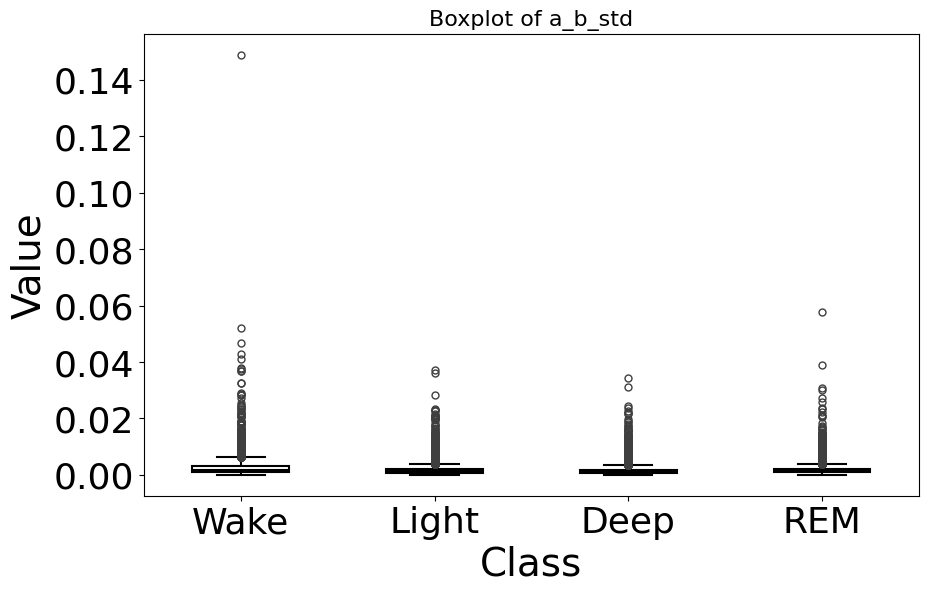

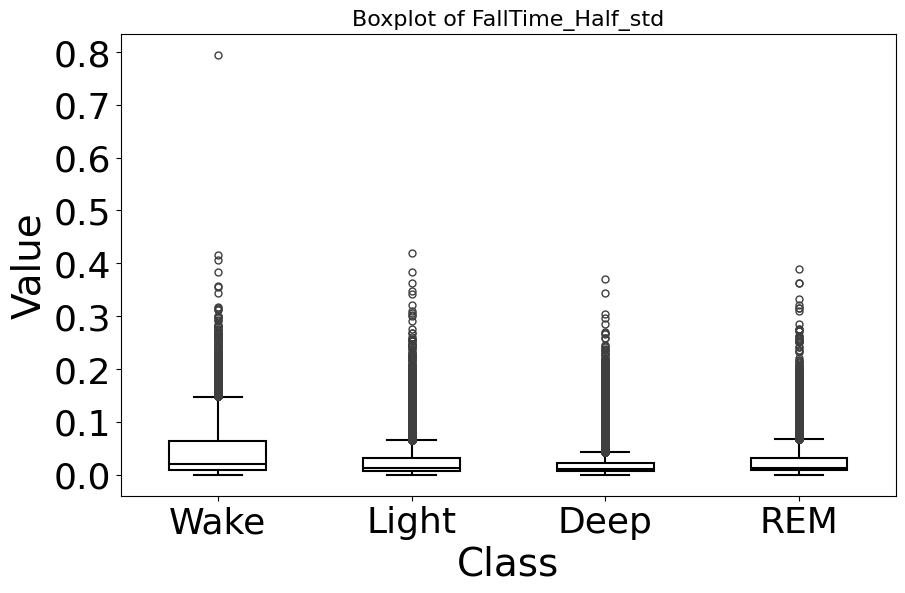

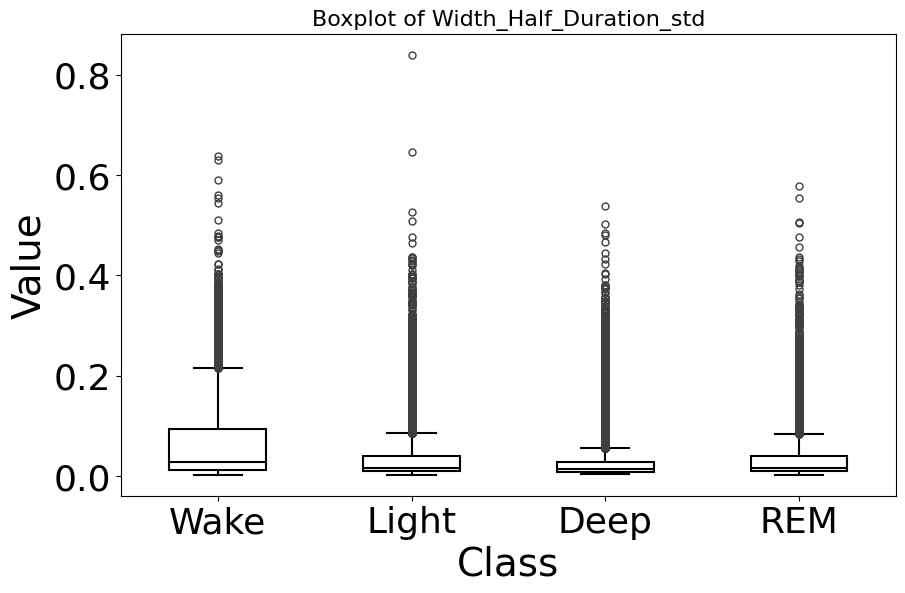

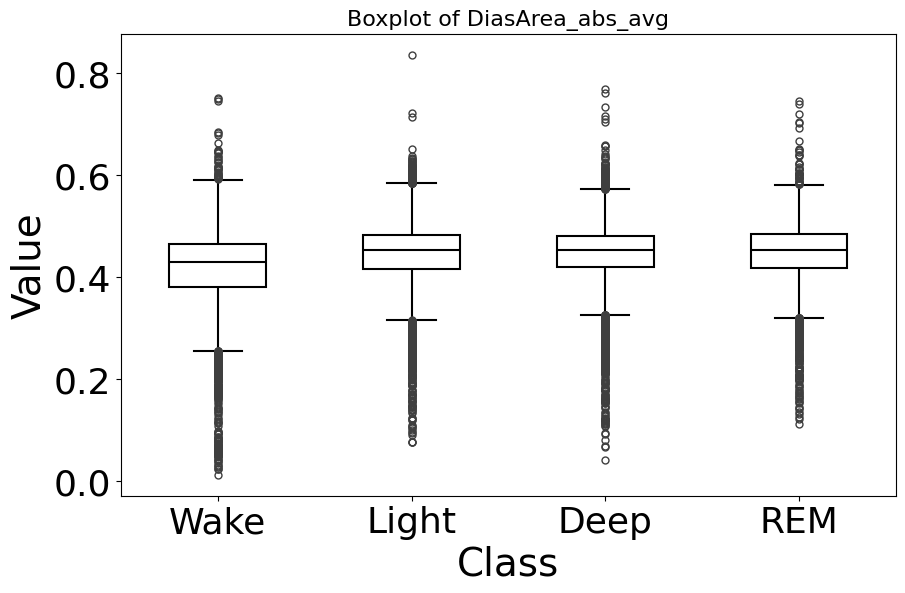

In [ ]:
# First, map your 'class' column to the desired string labels
# Create a dictionary to map the class values to sleep stages
class_mapping = {0: "Wake", 1: "Light", 2: "Deep", 3: "REM"}

# Replace the numerical class labels in your DataFrame with the string labels
top_features['class'] = top_features['class'].map(class_mapping)

feature_names = top_features.drop(columns='class').columns  # assuming 'class' column exists

for feature in feature_names:
    plt.figure(figsize=(10, 6))
    # Create a boxplot
    sns.boxplot(x='class', y=feature, data=top_features,
                width=0.5,
                fliersize=5,
                linewidth=1.5,
                boxprops={'facecolor': 'white', 'edgecolor': 'black'},
                whiskerprops={'color': 'black'},
                capprops={'color': 'black'},
                medianprops={'color': 'black'})

    plt.title(f'Boxplot of {feature}', fontsize=16)
    plt.xlabel('Class', fontsize=28)
    plt.ylabel('Value', fontsize=28)

    # Set x-ticks labels according to the class labels
    plt.xticks(fontsize=26)
    plt.yticks(fontsize=26)

    plt.show()
